<!DOCTYPE html>
<html>
<body>

<h1>ML Project No:1</h1>

<h3 > Students: </h3>

<pre style="font-size:17px;">
   Nohelia Merino &nbsp;&nbsp;&nbsp; 610117

   Arley Wilches &nbsp;&nbsp;&nbsp;&nbsp; 610110

   Kiran Luitel &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 610187
   
   Jasser Dhaouadi &nbsp;&nbsp; 610099
</pre>

</body>
</html>

<!DOCTYPE html>
<html>
<body>

<h1>Exploratory Data Analysis (EDA)</h1>



</body>
</html>


In [5]:
# Data Analysis & Preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import numpy as np
from scipy.stats import norm

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline

<!DOCTYPE html>
<html>
<body>

<h2>Acquire Data</h2>



</body>
</html>


In [6]:
df_train = pd.read_csv('watson.csv')

# preview the first 5 rows of the data
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<!DOCTYPE html>
<html>
<body>

<h2>Describing the Dataset</h2>


</body>
</html>

In [7]:
print(df_train.columns.values)

['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


<!DOCTYPE html>
<html>
<body>

<h3>Meanings of the attributes : </h3>

</body>
</html>

In [8]:
#List of attributes
#------------------------------------------------------------------------------------------------------
#customerID
#gender: female, male)
#SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
#Partner: Whether the customer has a partner or not (Yes, No)
#Dependents: Whether the customer has dependents or not (Yes, No)
#tenure: Number of months the customer has stayed with the company
#PhoneService: Whether the customer has a phone service or not (Yes, No)
#MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
#InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
#OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
#OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
#DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
#TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
#streamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
#streamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
#Contract: The contract term of the customer (Month-to-month, One year, Two year
#PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
#PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
#MonthlyCharges: The amount charged to the customer monthly — numeric
#TotalCharges: The total amount charged to the customer — numeric
#Churn: Whether the customer churned or not (Yes or No)

<!DOCTYPE html>
<html>
<body>

<h3>Categorical Features</h3>
<p> gender, SeniorCitizen, Partner, Dependents,
 PhoneService, MultipleLines, InternetService, OnlineSecurity,
 OnlineBackup, DeviceProtection, TechSupport, StreamingTV,
 StreamingMovies, Contract, PaperlessBilling and PaymentMethod</p>

<h3>Numerical Features</h3>
<p>tenure, MonthlyCharges and TotalCharges</p>

<h3>Class label</h3>
<p>Churn</p>

</body>
</html>

<!DOCTYPE html>
<html>
<body>


<h3>Data Types of Features</h3>


</body>
</html>

In [9]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [10]:
# Convert to Numeric Data Type
df_train['TotalCharges']=pd.to_numeric(df_train['TotalCharges'], errors='coerce')

# Convert to String Data Type
df_train['SeniorCitizen'] = df_train['SeniorCitizen'].astype(str)

print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(1), o

<!DOCTYPE html>
<html>
<body>

<h3>Distribution of Numerical Features</h3>

</body>
</html>

In [11]:
df_train.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- Mean('TotalCharges') is greater than Median('TotalCharges') : the distribution is Right-skewed</p>
<p>- Mean('MonthlyCharges') is less than Median('MonthlyCharges') : the distribution is Left-skewed</p>
<p>- Mean('tenure') is greater than Median('tenure') : the distribution is Right-skewed</p>



</body>
</html>

<!DOCTYPE html>
<html>
<body>

<h3>Distribution of Categorical Features</h3>

</body>
</html>

In [12]:
df_train.describe(include=['O'])

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,0174-QRVVY,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- The majority of the customers in the dataset didn't churn (5174 with churn = No)</p>
<p>- Large number of customers are Senior Citizens with No Dependents</p>
<p>- customerID is not a good feature for training</p>




</body>
</html>

<!DOCTYPE html>
<html>
<body>

<h3>Missing Values</h3>

</body>
</html>

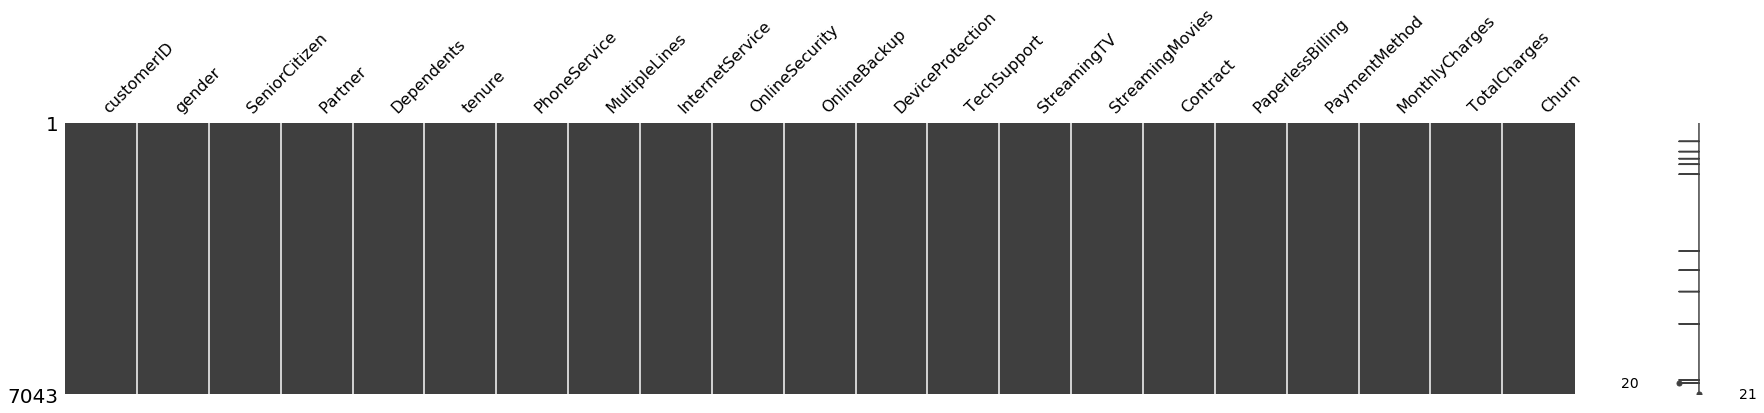

In [13]:
missingno.matrix(df_train, figsize = (30,5))

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- Almost all the features don't have missing values</p>
<p>- missingno.matrix is showing that there are few missing values but we can't figure out them from the figure</p>



<h4>Let's search the missing values per column numerically:</h4>

</body>
</html>

In [14]:
len(df_train.index)-df_train.count()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<!DOCTYPE html>
<html>
<body>

<h4>Dealing with missing values in TotalCharges attributes:</h4>

</body>
</html>

In [15]:
# filling TotalCharges null values with mean
df_train["TotalCharges"] = df_train["TotalCharges"].fillna(value=df_train.TotalCharges.mean())

In [16]:
df2 = pd.isnull(df_train)
result = False
for col in df_train.columns: 
    result = result | (df2[col] == True)
df_train = df_train.loc[~result]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(1), o

<!DOCTYPE html>
<html>
<body>

<h2>Visualization and Analysis</h2>


</body>
</html>

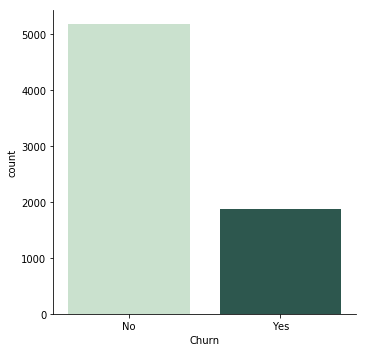

In [17]:
df_train_cleaned = df_train.copy()
sns.catplot(x='Churn', kind="count", palette="ch:2.5,-.2,dark=.3", data=df_train)

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- Large number of customers didn't churn</p>



</body>
</html>

([<matplotlib.patches.Wedge at 0x19e4d70f7b8>,
 [Text(0.016436707732256518, 1.0998771907076375, 'Female'),
  Text(-0.01643670773225665, -1.0998771907076375, 'Male')])

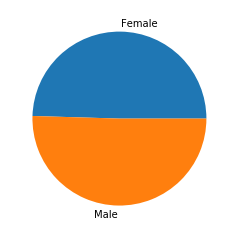

In [18]:
df_gender = pd.DataFrame(np.ones((df_train_cleaned.shape[0], 1))).groupby(df_train.gender).sum()
plt.pie(df_gender[0].tolist(),labels=df_gender.index)

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- We can observe almost an equal distribution between females and males</p>




</body>
</html>

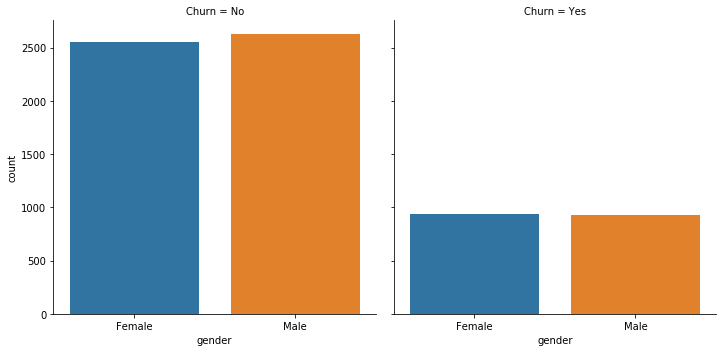

In [19]:
sns.catplot(x='gender', col='Churn', kind='count', data=df_train)

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- We have almost an equal number of males and females for both categories of 'Churn'</p>
<p>- Gender dosen't really affect our target variable (Churn)</p>


</body>
</html>

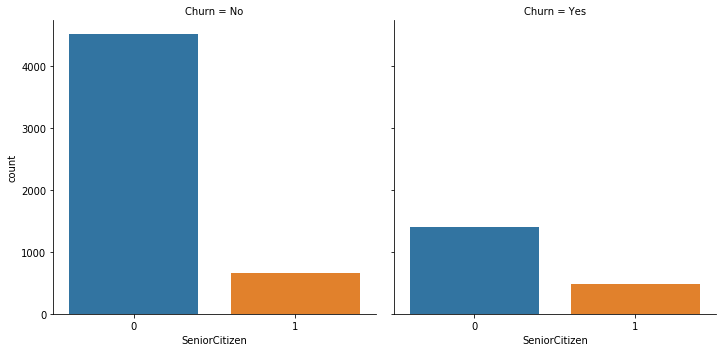

In [20]:
sns.catplot(x='SeniorCitizen', col='Churn', kind='count', data=df_train)

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- The majority of customers are non-SeniorCitizens</p>
<p>- Large number of non-SeniorCitizens don't churn  </p>
<p>- SeniorCitizens churn and don't churn almost equally (slight tendency to not churn)  </p>


</body>
</html>

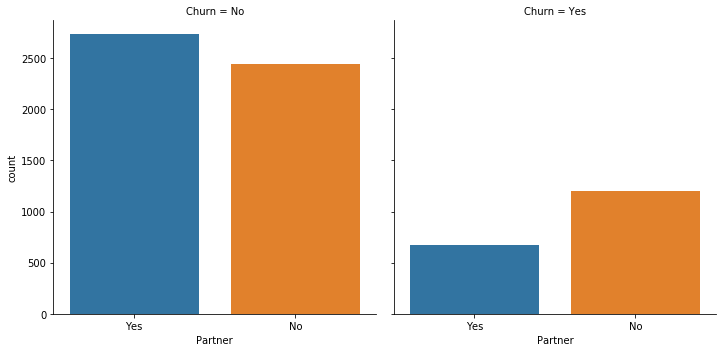

In [21]:
sns.catplot(x='Partner', col='Churn', kind='count', data=df_train)

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- Customers with partners tend to not churn</p>
<p>- Customers with no partners tend to churn </p>


</body>
</html>

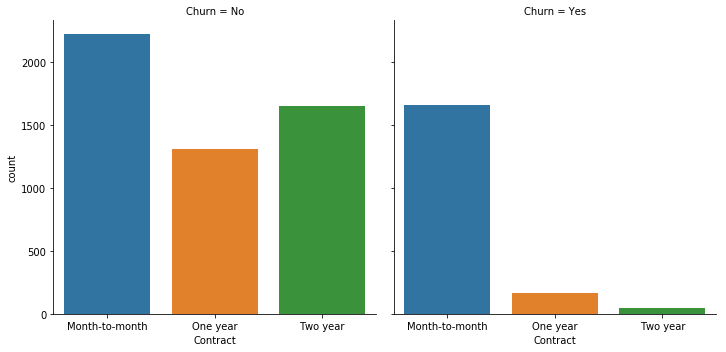

In [22]:
sns.catplot(x='Contract', col='Churn', kind='count', data=df_train)

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- The majority of churned customers have a Month-to-Month Contract (Short term)</p>
<p>- Few cases of churn where customers have long term contracts (1 year or 2 years) </p>
<p>- The majority of non-churned customers have 1 or 2 year Contract (long term)</p>


</body>
</html>

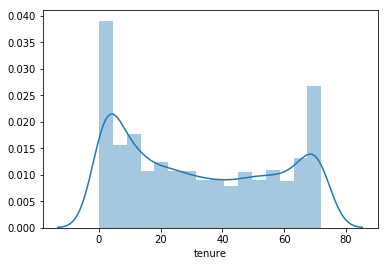

In [23]:
sns.distplot(df_train['tenure']);

<!DOCTYPE html>
<html>
<body>

<h4>Meaning of 'tenure' feature:</h4>
<p>For the already churned customer, tenure is the difference between the time the customer was lost and the time the customer was acquired</p> 
<p>For existing customers, tenure is the difference between the current time and the time the customer joined.</p>
<h4>Observation</h4>
<p>- The plot has 2 maximums </p>
<p>- Large number of customers have tenure in the following intervals [1,5] & [70,75]  </p>
<p>- In other words, large number of customers have small and large tenure</p>


</body>
</html

<!DOCTYPE html>
<html>
<body>

<h4>Distributions of other Numerical attributes</h4>


</body>
</htm

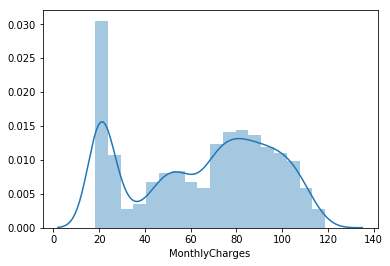

In [24]:
sns.distplot(df_train['MonthlyCharges'])

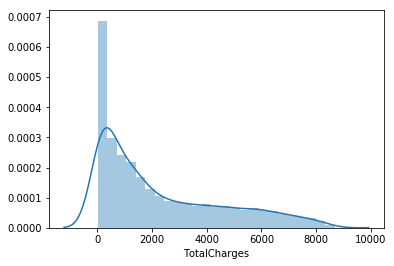

In [25]:
sns.distplot(df_train['TotalCharges'])

C:\Users\jasse\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


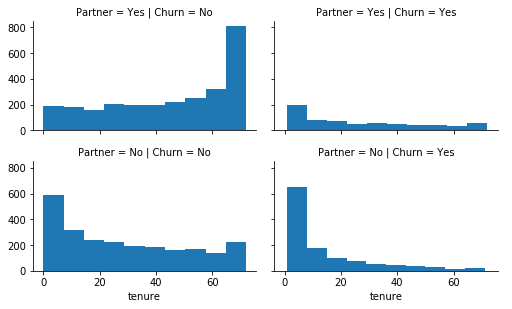

In [26]:
grid = sns.FacetGrid(df_train, col='Churn', row='Partner', size=2.2, aspect=1.6)
grid.map(plt.hist, 'tenure')
grid.add_legend()

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- Non-Churned Customers who have partner tend to have long period of tenure </p>
<p>- Non-Churned Customers who don't have partner tend to have short period of tenure  </p>
<p>- Generally, Churned Customers have short period of tenure</p>


</body>
</html

<!DOCTYPE html>
<html>
<body>


<h4>Create Ranges for 'tenure' Feature  </h4>

</body>
</html>

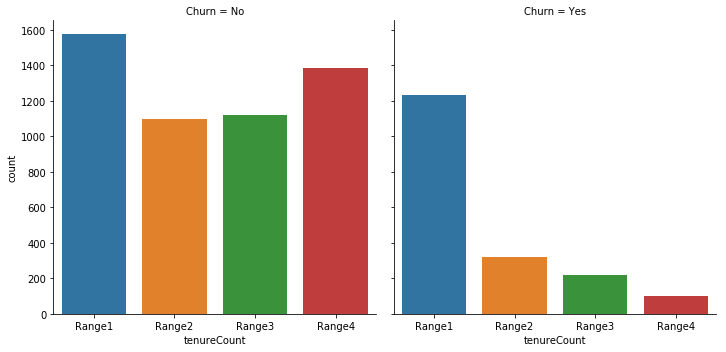

In [27]:
#For the already churned customer tenure is the difference between the time the customer 
#was lost and the time the customer was acquired, and for existing customers tenure is 
#the difference between the current time and the time the customer joined.

criteria = [df_train_cleaned['tenure'].between(0, 19), df_train_cleaned['tenure'].between(20, 39), df_train_cleaned['tenure'].between(40, 59), df_train_cleaned['tenure'].between(60, 79), df_train_cleaned['tenure'].between(80, np.inf)]
values = ['Range1','Range2','Range3','Range4','Range5']

df_train_cleaned['tenureCount'] = np.select(criteria, values, 0)
df_train_cleaned[['tenure','tenureCount']]

sns.catplot(x='tenureCount', col='Churn', kind='count', data=df_train_cleaned)


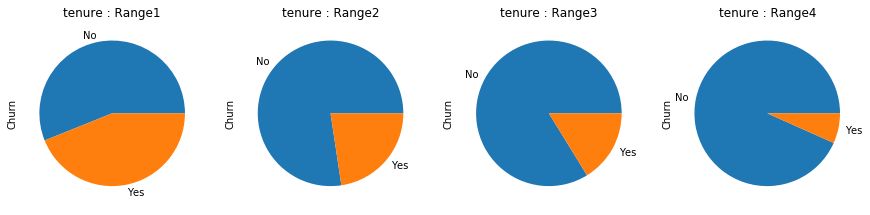

In [28]:
fig = plt.figure(figsize=(15,6))

i=1
for category in df_train_cleaned['tenureCount'].unique():
    fig.add_subplot(1, 4, i)
    plt.title('tenure : {}'.format(category))
    df_train.Churn[df_train_cleaned['tenureCount'] == category].value_counts().plot(kind='pie')
    i += 1

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- Non-Churned Customers tend to be in Range2-3-4 (Longer period of tenure)  </p>
<p>- Churned Customers tend to be in Range1 (short period of tenure)  </p>



</body>
</html

<!DOCTYPE html>
<html>
<body>


<h4>Modifications</h4>



</body>
</html

In [29]:
df_train['OnlineSecurity'] = df_train['OnlineSecurity'].map({'No internet service': 'No','No': 'No','Yes': 'Yes'})
df_train['OnlineBackup'] = df_train['OnlineBackup'].map({'No internet service': 'No','No': 'No','Yes': 'Yes'})
df_train['DeviceProtection'] = df_train['DeviceProtection'].map({'No internet service': 'No','No': 'No','Yes': 'Yes'})
df_train['TechSupport'] = df_train['TechSupport'].map({'No internet service': 'No','No': 'No','Yes': 'Yes'})
df_train['StreamingTV'] = df_train['StreamingTV'].map({'No internet service': 'No','No': 'No','Yes': 'Yes'})
df_train['StreamingMovies'] = df_train['StreamingMovies'].map({'No internet service': 'No','No': 'No','Yes': 'Yes'})
df_train['MultipleLines'] = df_train['MultipleLines'].map({'No phone service': 'No','No': 'No','Yes': 'Yes'})
df_train['tenure'] = df_train_cleaned['tenureCount']

In [30]:
df_train.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,Range1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Range2,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Range1,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,Range3,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Range1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<!DOCTYPE html>
<html>
<body>


<h4>Dropping 'CustomerID' Column</h4>



</body>
</html

In [31]:
del df_train['customerID']
df_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,Range1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,Range2,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,Range1,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,Range3,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,Range1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<!DOCTYPE html>
<html>
<body>


<h3>Let's explore the effect of several features on our target class (Churn)</h3>



</body>
</html

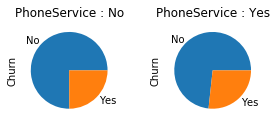

In [32]:
fig = plt.figure(figsize=(15,6))

i=1
for category in df_train['PhoneService'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('PhoneService : {}'.format(category))
    df_train.Churn[df_train['PhoneService'] == category].value_counts().plot(kind='pie')
    i += 1

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- Almost, PhoneService doesn't effect the Churn  </p>




</body>
</html

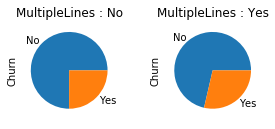

In [33]:
fig = plt.figure(figsize=(15,6))

i=1
for category in df_train['MultipleLines'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('MultipleLines : {}'.format(category))
    df_train.Churn[df_train['MultipleLines'] == category].value_counts().plot(kind='pie')
    i += 1

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- if multipleLines= No, the probability to not churn is higher than with multipleLines= Yes </p>




</body>
</html

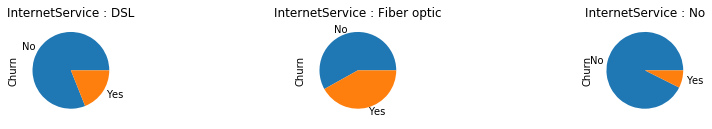

In [34]:
fig = plt.figure(figsize=(15,6))

i=1
for category in df_train['InternetService'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('InternetService : {}'.format(category))
    df_train.Churn[df_train['InternetService'] == category].value_counts().plot(kind='pie')
    i += 2

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- The probability to churn with no Internet service is so low </p>
<p>- Given that the Internet service is activated, Fiber optic users are more likely to churn </p>




</body>
</html

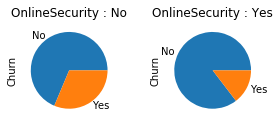

In [35]:
fig = plt.figure(figsize=(15,6))

i=1
for category in df_train['OnlineSecurity'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('OnlineSecurity : {}'.format(category))
    df_train.Churn[df_train['OnlineSecurity'] == category].value_counts().plot(kind='pie')
    i += 1

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- if OnlineSecurity=Yes, customers are less likely to churn </p>





</body>
</html

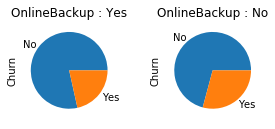

In [36]:
fig = plt.figure(figsize=(15,6))

i=1
for category in df_train['OnlineBackup'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('OnlineBackup : {}'.format(category))
    df_train.Churn[df_train['OnlineBackup'] == category].value_counts().plot(kind='pie')
    i += 1

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- if OnlineBackup=Yes, customers are less likely to churn </p>





</body>
</html

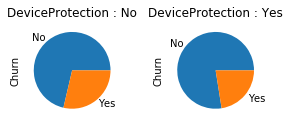

In [37]:
fig = plt.figure(figsize=(15,6))

i=1
for category in df_train['DeviceProtection'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('DeviceProtection : {}'.format(category))
    df_train.Churn[df_train['DeviceProtection'] == category].value_counts().plot(kind='pie')
    i += 1

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- if DeviceProtection=Yes, customers are less likely to churn </p>





</body>
</html

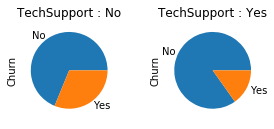

In [38]:
fig = plt.figure(figsize=(15,6))

i=1
for category in df_train['TechSupport'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('TechSupport : {}'.format(category))
    df_train.Churn[df_train['TechSupport'] == category].value_counts().plot(kind='pie')
    i += 1

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- if TechSupport=Yes, customers are less likely to churn </p>





</body>
</html

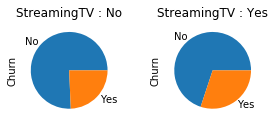

In [39]:
fig = plt.figure(figsize=(15,6))

i=1
for category in df_train['StreamingTV'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('StreamingTV : {}'.format(category))
    df_train.Churn[df_train['StreamingTV'] == category].value_counts().plot(kind='pie')
    i += 1

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- if StreamingTV=Yes, customers are more likely to churn </p>





</body>
</html

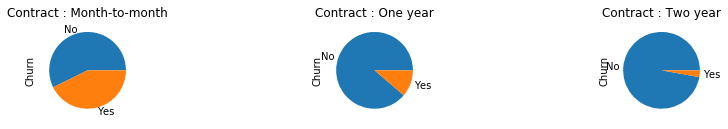

In [40]:
fig = plt.figure(figsize=(15,6))

i=1
for category in df_train['Contract'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Contract : {}'.format(category))
    df_train.Churn[df_train['Contract'] == category].value_counts().plot(kind='pie')
    i += 2

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- The longer the period of contract, the more likely the customer not to churn </p>





</body>
</html

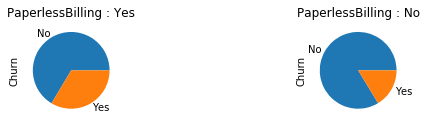

In [41]:
fig = plt.figure(figsize=(15,6))

i=1
for category in df_train['PaperlessBilling'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('PaperlessBilling : {}'.format(category))
    df_train.Churn[df_train['PaperlessBilling'] == category].value_counts().plot(kind='pie')
    i += 2

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- if PaperlessBilling=No, customers are less likely to churn </p>





</body>
</html

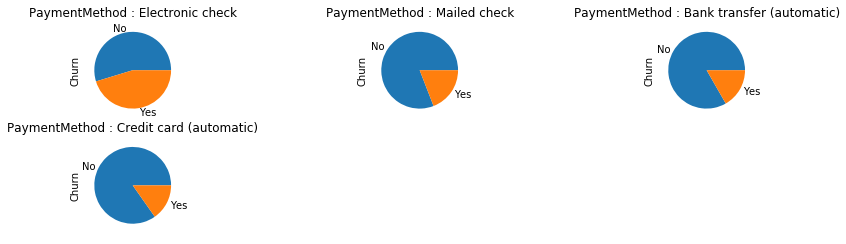

In [42]:
fig = plt.figure(figsize=(15,6))

i=1
for category in df_train['PaymentMethod'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('PaymentMethod : {}'.format(category))
    df_train.Churn[df_train['PaymentMethod'] == category].value_counts().plot(kind='pie')
    i += 2

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- if PaymentMethod+Electronic Check, customers are more likely to churn </p>





</body>
</html

<!DOCTYPE html>
<html>
<body>

<h3>Feature Importance : Information Gain  </h3>

</body>
</html>

In [43]:
# Jasser Comment 
# To install info_gain package
# 1- open Anaconda Prompt
# 2- run : pip install info_gain

from info_gain import info_gain
import operator

df_COPY = df_train.copy()
df_COPY.head()
del df_COPY['MonthlyCharges']
del df_COPY['TotalCharges']
df_COPY.head()
Attributes= df_COPY.drop("Churn", axis=1)
Class = df_COPY["Churn"].copy()

d={}
for attr in Attributes:
    ig  = info_gain.info_gain(Attributes[attr].tolist(), Class.tolist())
    d[attr]=ig
    
d=sorted(d.items(), key=operator.itemgetter(1),reverse = True)
for feature in d:
    print(feature)

('Contract', 0.09845305342598953)
('tenure', 0.062056198227595116)
('InternetService', 0.05557418477268872)
('PaymentMethod', 0.044518668630903147)
('PaperlessBilling', 0.019194399646111693)
('OnlineSecurity', 0.01588472344572711)
('TechSupport', 0.014608433235833496)
('Dependents', 0.014467261139424092)
('Partner', 0.01145365725331804)
('SeniorCitizen', 0.01057726395398767)
('OnlineBackup', 0.0034600133099735864)
('DeviceProtection', 0.002227526333996588)
('StreamingTV', 0.0019809037063375223)
('StreamingMovies', 0.001867919867874157)
('MultipleLines', 0.0008009687297056978)
('PhoneService', 7.215949187011628e-05)
('gender', 3.708291440474021e-05)


In [44]:
del df_train['gender']
del df_train['PhoneService']
del df_train['MultipleLines']
del df_train['StreamingMovies']

<!DOCTYPE html>
<html>
<body>

<h3>Encoding Categorical Attributes </h3>

</body>
</html>

In [45]:
encoded_data = pd.get_dummies(df_train,columns=[ 'tenure', 'Partner', 'Dependents','InternetService','OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod','Churn'])
encoded_data.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,tenure_Range1,tenure_Range2,tenure_Range3,tenure_Range4,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,29.85,29.85,1,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
1,0,56.95,1889.50,0,1,0,0,1,0,1,...,1,0,1,0,0,0,0,1,1,0
2,0,53.85,108.15,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,1
3,0,42.30,1840.75,0,0,1,0,1,0,1,...,1,0,1,0,1,0,0,0,1,0
4,0,70.70,151.65,1,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1


In [46]:
final_subset = encoded_data[['SeniorCitizen','tenure_Range1','tenure_Range2','tenure_Range3','tenure_Range4','MonthlyCharges','TotalCharges','Partner_Yes','Dependents_Yes','InternetService_DSL','InternetService_Fiber optic','InternetService_No','OnlineSecurity_Yes','OnlineBackup_Yes','DeviceProtection_Yes','TechSupport_Yes','StreamingTV_Yes','Contract_Month-to-month','Contract_One year','Contract_Two year','PaperlessBilling_Yes','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check','Churn_Yes']]

final_subset['SeniorCitizen']=pd.to_numeric(final_subset['SeniorCitizen'], errors='coerce')
final_subset.head(5)

C:\Users\jasse\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SeniorCitizen,tenure_Range1,tenure_Range2,tenure_Range3,tenure_Range4,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,InternetService_DSL,...,StreamingTV_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,0,0,0,29.85,29.85,1,0,1,...,0,1,0,0,1,0,0,1,0,0
1,0,0,1,0,0,56.95,1889.50,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,53.85,108.15,0,0,1,...,0,1,0,0,1,0,0,0,1,1
3,0,0,0,1,0,42.30,1840.75,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,0,1,0,0,0,70.70,151.65,0,0,0,...,0,1,0,0,1,0,0,1,0,1


<!DOCTYPE html>
<html>
<body>

<h3>Exploring Relations with Boxplots </h3>

</body>
</html>

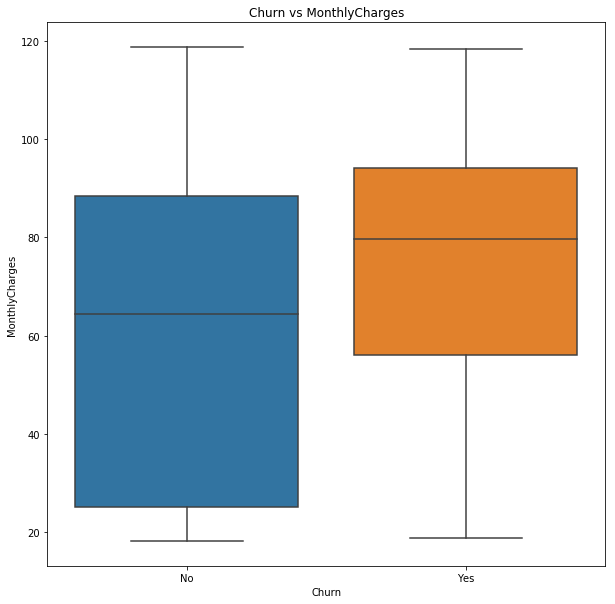

In [47]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df_train) 
plt.title('Churn vs MonthlyCharges')
plt.show()

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- More expensive Monthly charges lead to churn (comparing the medians) </p>
<p>- Churn=No : IQR(Monthly charges) is wide [great variation]  </p>
<p>- No outliers </p>



</body>
</html

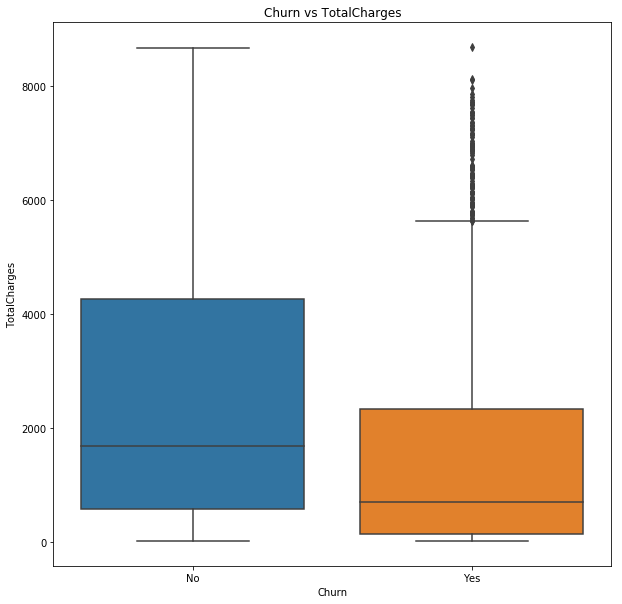

In [48]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Churn", y="TotalCharges", data=df_train) 
plt.title('Churn vs TotalCharges')
plt.show()

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- Greater values of total charges reflect not churn (comparing the medians) </p>
<p>- Churn=No : IQR(total charges) is wide [great variation]  </p>
<p>- There are some outliers </p>



</body>
</html

<!DOCTYPE html>
<html>
<body>


<h4>Correlation between MonthlyCharges & TotalCharges</h4>


</body>
</html

Correlation coefficient: 0.6504680404415563


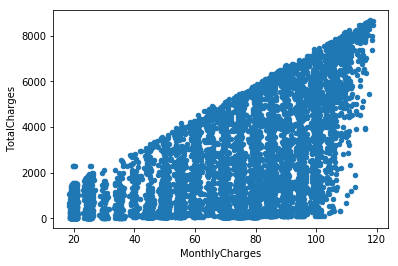

In [49]:
print('Correlation coefficient: ' + str(df_train['MonthlyCharges'].corr(df_train['TotalCharges'])))
df_train.plot.scatter(x='MonthlyCharges', y='TotalCharges')

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- The 2 numerical features are highly correlated </p>
<p>- They are positively associated  </p>
<p>- The 2 features represent almost the same meaning </p>



</body>
</html

<!DOCTYPE html>
<html>
<body>


<h3>Normalization</h3>



</body>
</html

In [50]:
#We observe MC and TC are strongly correlated
from sklearn import preprocessing

del final_subset['TotalCharges']
data_normalized = final_subset.dropna().copy()
min_max_scaler = preprocessing.MinMaxScaler()



#print(data_normalized['MonthlyCharges'].iloc[0])

#X_min = data_normalized['MonthlyCharges'].min()
#X_max = data_normalized['MonthlyCharges'].max()
#X_std = data_normalized['MonthlyCharges'].std()
#X = data_normalized['MonthlyCharges'].iloc[0]

#X_scaled = (X - 18.25) / (118.75 - 18.25)

#mC_scaled1 = min_max_scaler.fit_transform(np.array(data_normalized['MonthlyCharges']).reshape(-1,1))
data_normalized['MonthlyCharges'] = min_max_scaler.fit_transform(np.array(data_normalized['MonthlyCharges']).reshape(-1,1))


#print(X_min)
#print(X_max)
#print(X_scaled)

#print(data_normalized['MonthlyCharges'].iloc[0])

#tC_scaled2 = min_max_scaler.fit_transform(np.array(data_normalized['TotalCharges']).reshape(-1,1))
#data_normalized['TotalCharges'] = min_max_scaler.fit_transform(np.array(data_normalized['TotalCharges']).reshape(-1,1))
Model_subset = data_normalized.copy()
Model_subset.head(5)

,SeniorCitizen,tenure_Range1,tenure_Range2,tenure_Range3,tenure_Range4,MonthlyCharges,Partner_Yes,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,...,StreamingTV_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,0,0,0,0.115423,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0.385075,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0.354229,0,0,1,0,...,0,1,0,0,1,0,0,0,1,1
3,0,0,0,1,0,0.239303,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
4,0,1,0,0,0,0.521891,0,0,0,1,...,0,1,0,0,1,0,0,1,0,1


<!DOCTYPE html>
<html>
<body>


<h3>Heatmap representing correlations between features</h3>



</body>
</html

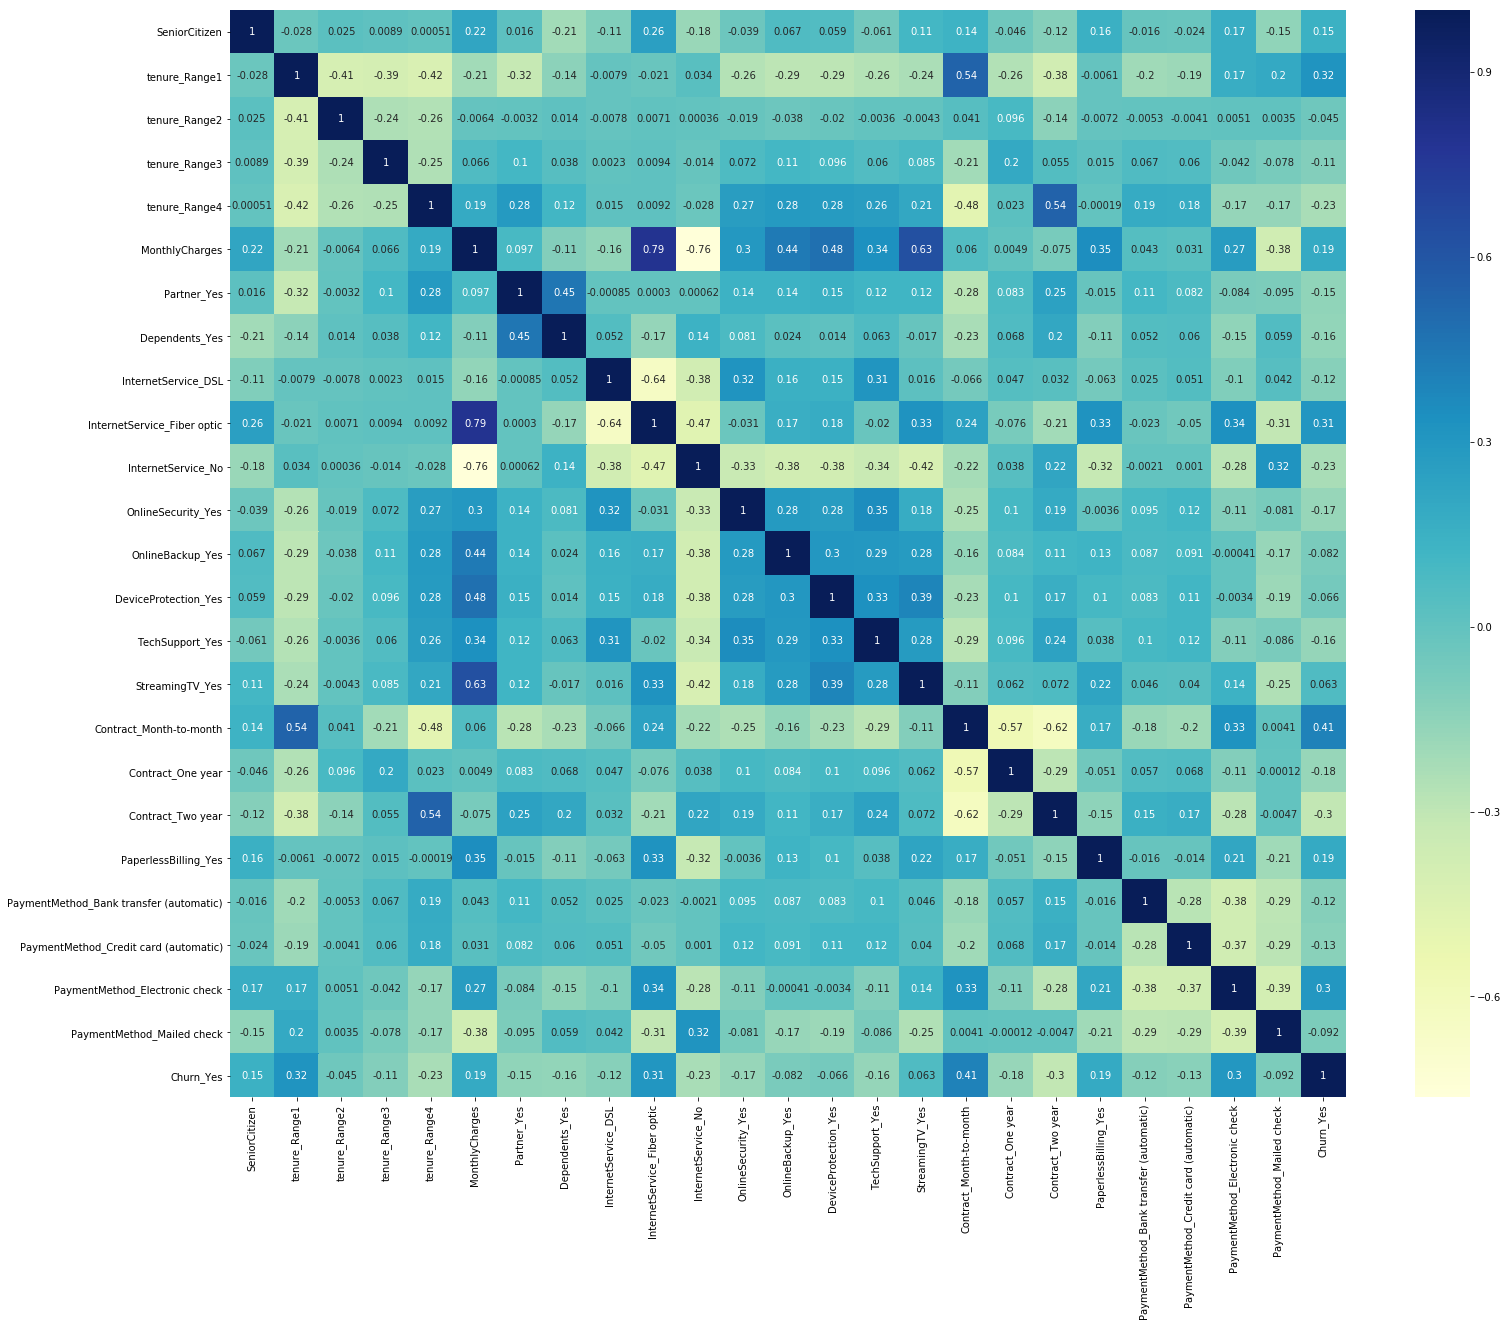

In [51]:
%matplotlib inline
#Model_subset = data_normalized.copy()
#Model_subset.head(5)
corr = Model_subset.corr()
# plot heatmap
plt.subplots(figsize=(25,20))
sns.heatmap(corr,annot=True,xticklabels=corr.columns,yticklabels=corr.columns,cmap="YlGnBu")

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- Examples of High correlated features:  (Churn, tenure_Range1) , (churn,contract_Month-to-Month) ...</p>





</body>
</html

In [48]:
# consider dropping gender-total charges-phone service

<!DOCTYPE html>
<html>
<body>

<h3>PCA </h3>

</body>
</html>

In [49]:
#Dimensionality Reduction from 30 to 

from sklearn.decomposition import PCA

Model_subset_X = Model_subset.drop('Churn_Yes', axis=1)

#Model_subset_X = Model_subset_X.drop(['gender_Female','PhoneService_Yes','MultipleLines_Yes','TotalCharges'], axis=1)
# we retain 95% of the variation 
pca = PCA(0.95).fit(Model_subset_X)
print(pca.n_components_ )
trainimg = pca.transform(Model_subset_X)
trainimg = pd.DataFrame(data=trainimg)

17


In [54]:
#Setting the training and testing data
from sklearn.model_selection import train_test_split
import math

X_all = Model_subset.drop(['Churn_Yes'], axis=1)
#X_all = trainimg
y_all = Model_subset["Churn_Yes"].copy()

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=42)

<!DOCTYPE html>
<html>
<body>
<h3>MODELS </h3>
</body>
</html>

<!DOCTYPE html>
<html>
<body>
<p>
<h5>Helper methods </h5></p><p>
<h10>Source code: https://github.com/kylewest520/CS-7641---Machine-Learning/blob/master/Assignment%201%20Supervised%20Learning/CS%207641%20HW1%20Code.py </h10></p>
</body>
</html>

In [52]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import itertools
import timeit

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['font.size'] = 12
plt.rcParams["figure.figsize"] = (8,6)


def plot_learning_curve(clf, X, y, scoring, title="Insert Title"):
    
    n = len(y)
    train_mean = []; train_std = [] #model performance score (f1)
    cv_mean = []; cv_std = [] #model performance score (f1)
    fit_mean = []; fit_std = [] #model fit/training time
    pred_mean = []; pred_std = [] #model test/prediction times
    train_sizes=(np.linspace(.05, 1.0, 20)*n).astype('int')  
    
    for i in train_sizes:
        idx = np.random.randint(X.shape[0], size=i)
        X_subset = X.iloc[idx,:]
        y_subset = y.iloc[idx]
        scores = cross_validate(clf, X_subset, y_subset, cv=10, scoring=scoring, n_jobs=-1, return_train_score=True)
        
        train_mean.append(np.mean(scores['train_score'])); train_std.append(np.std(scores['train_score']))
        cv_mean.append(np.mean(scores['test_score'])); cv_std.append(np.std(scores['test_score']))
        fit_mean.append(np.mean(scores['fit_time'])); fit_std.append(np.std(scores['fit_time']))
        pred_mean.append(np.mean(scores['score_time'])); pred_std.append(np.std(scores['score_time']))
    
    train_mean = np.array(train_mean); train_std = np.array(train_std)
    cv_mean = np.array(cv_mean); cv_std = np.array(cv_std)
    fit_mean = np.array(fit_mean); fit_std = np.array(fit_std)
    pred_mean = np.array(pred_mean); pred_std = np.array(pred_std)
    
    plot_LC(train_sizes, train_mean, train_std, cv_mean, cv_std, title, scoring)
    #plot_times(train_sizes, fit_mean, fit_std, pred_mean, pred_std, title)
    
    return train_sizes, train_mean, fit_mean, pred_mean
    

def plot_LC(train_sizes, train_mean, train_std, cv_mean, cv_std, title, scoring):
    
    plt.figure()
    plt.title("Learning Curve: "+ title)
    plt.xlabel("Training Examples")
    plt.ylabel("Model "+scoring+ " score")
    plt.fill_between(train_sizes, train_mean - 2*train_std, train_mean + 2*train_std, alpha=0.1, color="green")
    plt.fill_between(train_sizes, cv_mean - 2*cv_std, cv_mean + 2*cv_std, alpha=0.1, color="black")
    plt.plot(train_sizes, train_mean, 'o-', color="green", label="Training Score")
    plt.plot(train_sizes, cv_mean, 'o-', color="black", label="Cross-Validation Score")
    plt.legend(loc="best")
    plt.show()
    

def plot_learning_curve_combined(clf_1,clf_2,clf_3,clf_4, X, y, scoring, title="Insert Title"):
    
    n = len(y)
    train_mean_1 = []; train_std_1 = [] #model performance score (f1)
    cv_mean_1 = []; cv_std_1 = [] #model performance score (f1)
    fit_mean_1 = []; fit_std_1 = [] #model fit/training time
    pred_mean_1 = []; pred_std_1 = [] #model test/prediction times
    train_sizes_1=(np.linspace(.05, 1.0, 20)*n).astype('int')  
    
    for i in train_sizes_1:
        idx = np.random.randint(X.shape[0], size=i)
        X_subset = X.iloc[idx,:]
        y_subset = y.iloc[idx]
        scores = cross_validate(clf_1, X_subset, y_subset, cv=10, scoring=scoring, n_jobs=-1, return_train_score=True)
        
        train_mean_1.append(np.mean(scores['train_score'])); train_std_1.append(np.std(scores['train_score']))
        cv_mean_1.append(np.mean(scores['test_score'])); cv_std_1.append(np.std(scores['test_score']))
        fit_mean_1.append(np.mean(scores['fit_time'])); fit_std_1.append(np.std(scores['fit_time']))
        pred_mean_1.append(np.mean(scores['score_time'])); pred_std_1.append(np.std(scores['score_time']))
    
    train_mean_1 = np.array(train_mean_1); train_std_1 = np.array(train_std_1)
    cv_mean_1 = np.array(cv_mean_1); cv_std_1 = np.array(cv_std_1)
    fit_mean_1 = np.array(fit_mean_1); fit_std_1 = np.array(fit_std_1)
    pred_mean_1 = np.array(pred_mean_1); pred_std_1 = np.array(pred_std_1)
    
    
    train_mean_2 = []; train_std_2 = [] #model performance score (f1)
    cv_mean_2 = []; cv_std_2 = [] #model performance score (f1)
    fit_mean_2 = []; fit_std_2 = [] #model fit/training time
    pred_mean_2 = []; pred_std_2 = [] #model test/prediction times
    train_sizes_2=(np.linspace(.05, 1.0, 20)*n).astype('int')  
    
    for i in train_sizes_2:
        idx = np.random.randint(X.shape[0], size=i)
        X_subset = X.iloc[idx,:]
        y_subset = y.iloc[idx]
        scores = cross_validate(clf_2, X_subset, y_subset, cv=10, scoring=scoring, n_jobs=-1, return_train_score=True)
        
        train_mean_2.append(np.mean(scores['train_score'])); train_std_2.append(np.std(scores['train_score']))
        cv_mean_2.append(np.mean(scores['test_score'])); cv_std_2.append(np.std(scores['test_score']))
        fit_mean_2.append(np.mean(scores['fit_time'])); fit_std_2.append(np.std(scores['fit_time']))
        pred_mean_2.append(np.mean(scores['score_time'])); pred_std_2.append(np.std(scores['score_time']))
    
    train_mean_2 = np.array(train_mean_2); train_std_2 = np.array(train_std_2)
    cv_mean_2 = np.array(cv_mean_2); cv_std_2 = np.array(cv_std_2)
    fit_mean_2 = np.array(fit_mean_2); fit_std_2 = np.array(fit_std_2)
    pred_mean_2 = np.array(pred_mean_2); pred_std_2 = np.array(pred_std_2)
    
    train_mean_3 = []; train_std_3 = [] #model performance score (f1)
    cv_mean_3 = []; cv_std_3 = [] #model performance score (f1)
    fit_mean_3 = []; fit_std_3 = [] #model fit/training time
    pred_mean_3 = []; pred_std_3 = [] #model test/prediction times
    train_sizes_3=(np.linspace(.05, 1.0, 20)*n).astype('int')  
    
    for i in train_sizes_3:
        idx = np.random.randint(X.shape[0], size=i)
        X_subset = X.iloc[idx,:]
        y_subset = y.iloc[idx]
        scores = cross_validate(clf_3, X_subset, y_subset, cv=10, scoring=scoring, n_jobs=-1, return_train_score=True)
        
        train_mean_3.append(np.mean(scores['train_score'])); train_std_3.append(np.std(scores['train_score']))
        cv_mean_3.append(np.mean(scores['test_score'])); cv_std_3.append(np.std(scores['test_score']))
        fit_mean_3.append(np.mean(scores['fit_time'])); fit_std_3.append(np.std(scores['fit_time']))
        pred_mean_3.append(np.mean(scores['score_time'])); pred_std_3.append(np.std(scores['score_time']))
    
    train_mean_3 = np.array(train_mean_3); train_std_3 = np.array(train_std_3)
    cv_mean_3 = np.array(cv_mean_3); cv_std_3 = np.array(cv_std_3)
    fit_mean_3 = np.array(fit_mean_3); fit_std_3 = np.array(fit_std_3)
    pred_mean_3 = np.array(pred_mean_3); pred_std_3 = np.array(pred_std_3)
    

    train_mean_4 = []; train_std_4 = [] #model performance score (f1)
    cv_mean_4 = []; cv_std_4 = [] #model performance score (f1)
    fit_mean_4 = []; fit_std_4 = [] #model fit/training time
    pred_mean_4 = []; pred_std_4 = [] #model test/prediction times
    train_sizes_4=(np.linspace(.05, 1.0, 20)*n).astype('int')  
    
    for i in train_sizes_4:
        idx = np.random.randint(X.shape[0], size=i)
        X_subset = X.iloc[idx,:]
        y_subset = y.iloc[idx]
        scores = cross_validate(clf_4, X_subset, y_subset, cv=10, scoring=scoring, n_jobs=-1, return_train_score=True)
        
        train_mean_4.append(np.mean(scores['train_score'])); train_std_4.append(np.std(scores['train_score']))
        cv_mean_4.append(np.mean(scores['test_score'])); cv_std_4.append(np.std(scores['test_score']))
        fit_mean_4.append(np.mean(scores['fit_time'])); fit_std_4.append(np.std(scores['fit_time']))
        pred_mean_4.append(np.mean(scores['score_time'])); pred_std_4.append(np.std(scores['score_time']))
    
    train_mean_4 = np.array(train_mean_4); train_std_4 = np.array(train_std_4)
    cv_mean_4 = np.array(cv_mean_4); cv_std_4 = np.array(cv_std_4)
    fit_mean_4 = np.array(fit_mean_4); fit_std_4 = np.array(fit_std_4)
    pred_mean_4 = np.array(pred_mean_4); pred_std_4 = np.array(pred_std_4)
   
    
    plt.figure()
    plt.title("Learning Curve: "+ title)
    plt.xlabel("Training Examples")
    plt.ylabel("Model "+scoring+ " score")
    plt.fill_between(train_sizes_1, train_mean_1 - 2*train_std_1, train_mean_1 + 2*train_std_1, alpha=0.1, color="green")
    plt.fill_between(train_sizes_1, cv_mean_1 - 2*cv_std_1, cv_mean_1 + 2*cv_std_1, alpha=0.1, color="black")
    plt.plot(train_sizes_1, train_mean_1, 'o-', color="green", label="Training Score Random Forest")
    plt.plot(train_sizes_1, cv_mean_1, 'o-', color="black", label="Cross-Validation Score Random Forest")
    
    
    plt.fill_between(train_sizes_2, train_mean_2 - 2*train_std_2, train_mean_2 + 2*train_std_2, alpha=0.1, color="red")
    plt.fill_between(train_sizes_2, cv_mean_2 - 2*cv_std_2, cv_mean_2 + 2*cv_std_2, alpha=0.1, color="blue")
    plt.plot(train_sizes_2, train_mean_2, 'o-', color="red", label="Training Score Neural Network")
    plt.plot(train_sizes_2, cv_mean_2, 'o-', color="blue", label="Cross-Validation Score  Neural Network")
    
    
    plt.fill_between(train_sizes_3, train_mean_3 - 2*train_std_3, train_mean_3 + 2*train_std_3, alpha=0.1, color="magenta")
    plt.fill_between(train_sizes_3, cv_mean_3 - 2*cv_std_3, cv_mean_3 + 2*cv_std_3, alpha=0.1, color="maroon")
    plt.plot(train_sizes_3, train_mean_3, 'o-', color="magenta", label="Training Score SVM")
    plt.plot(train_sizes_3, cv_mean_3, 'o-', color="maroon", label="Cross-Validation Score SVM")
    
    
    plt.fill_between(train_sizes_4, train_mean_4 - 2*train_std_4, train_mean_4 + 2*train_std_4, alpha=0.1, color="sienna")
    plt.fill_between(train_sizes_4, cv_mean_4 - 2*cv_std_4, cv_mean_4 + 2*cv_std_4, alpha=0.1, color="khaki")
    plt.plot(train_sizes_4, train_mean_4, 'o-', color="sienna", label="Training Score KNN")
    plt.plot(train_sizes_4, cv_mean_4, 'o-', color="khaki", label="Cross-Validation Score KNN")
    
    
    plt.legend(loc="best")
    plt.show() 
    
   
    
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Greens):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(2), range(2)):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')    
    
def final_classifier_evaluation(clf,X_train, X_test, y_train, y_test):
    
    start_time = timeit.default_timer()
    clf.fit(X_train, y_train)
    end_time = timeit.default_timer()
    training_time = end_time - start_time
    
    start_time = timeit.default_timer()    
    y_pred = clf.predict(X_test)
    end_time = timeit.default_timer()
    pred_time = end_time - start_time
    y_pred_train = clf.predict(X_train)
    
    auc_train = roc_auc_score(y_train, y_pred_train)
    f1_train = f1_score(y_train,y_pred_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    precision_train = precision_score(y_train,y_pred_train)
    recall_train = recall_score(y_train,y_pred_train)
    
    auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)

    print("Model Evaluation Metrics Using Untouched Test Dataset")
    print("*****************************************************")
    print("Model Training Time (s):   "+"{:.5f}".format(training_time))
    print("Model Prediction Time (s): "+"{:.5f}\n".format(pred_time))
    print("Training Metrics\n")
    print("F1 Score:  "+"{:.2f}".format(f1_train))
    print("Accuracy:  "+"{:.2f}".format(accuracy_train)+"     AUC:       "+"{:.2f}".format(auc_train))
    print("Precision: "+"{:.2f}".format(precision_train)+"     Recall:    "+"{:.2f}".format(recall_train))
    print("\nTesting Metrics\n")
    print("F1 Score:  "+"{:.2f}".format(f1))
    print("Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
    print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
    print("*****************************************************")
    plt.figure()
    plot_confusion_matrix(cm, classes=["0","1"], title='Confusion Matrix')
    plt.show()
    

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV

<!DOCTYPE html>
<html>
<body>
<h5>RANDOM FOREST </h5>
<p><h5>Helper methods </h5><p>
<h10>Source code: https://github.com/kylewest520/CS-7641---Machine-Learning/blob/master/Assignment%201%20Supervised%20Learning/CS%207641%20HW1%20Code.py </h10></p>
</body>
</html>

In [53]:
from sklearn.ensemble import RandomForestClassifier    
def hyperForest(X_train, y_train, X_test, y_test, title):
    
    f1_test = []
    f1_train = []
    accuracy_test = []
    accuracy_train = []
    roc_auc_test = []
    roc_auc_train = []
    max_depth = list(range(1,31))
    for i in max_depth:         
            clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=i, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, n_estimators=19,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start='false')
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            f1_test.append(f1_score(y_test, y_pred_test,average='binary'))
            f1_train.append(f1_score(y_train, y_pred_train,average='binary'))
            accuracy_test.append(accuracy_score(y_test, y_pred_test, normalize=True))
            accuracy_train.append(accuracy_score(y_train, y_pred_train, normalize=True))
            roc_auc_test.append(roc_auc_score(y_test, y_pred_test) )
            roc_auc_train.append(roc_auc_score(y_train, y_pred_train) )
      
    plt.plot(max_depth, f1_test, 'o-', color='green', label='Test F1 Score')
    plt.plot(max_depth, f1_train, 'o-', color = 'black', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('Max Tree Depth')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    #plt.figure(figsize=(20,100))
    plt.show()
     
    plt.plot(max_depth, accuracy_test, 'o-', color='green', label='Test Accuracy Score')
    plt.plot(max_depth, accuracy_train, 'o-', color = 'black', label='Train Accuracy Score')
    plt.ylabel('Model Accuracy Score')
    plt.xlabel('Max Tree Depth')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    plt.plot(max_depth, roc_auc_test, 'o-', color='green', label='Test ROC AUC Score')
    plt.plot(max_depth, roc_auc_train, 'o-', color = 'black', label='Train ROC AUC Score')
    plt.ylabel('Model ROC AUC Score')
    plt.xlabel('Max Tree Depth')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [236]:
# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [9,19,29,99], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': list(range(5,31)), 
              'min_samples_split': [5, 15, 25, 35],
              'min_samples_leaf': [8,18,28],
              'warm_start': ['false']
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)

#for X_train, y_train in X_trains, y_trains:
grid_obj = grid_obj.fit(X_train, y_train )

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator_model = clf.fit(X_train, y_train)

estimator_model

/home/nmerinos/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nmerinos/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=17, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, n_estimators=19,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start='false')

<!DOCTYPE html>
<html>
<body>
<h5>Complexity Curves in Random Forest</h5>
</body>
</html>

/home/nmerinos/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nmerinos/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


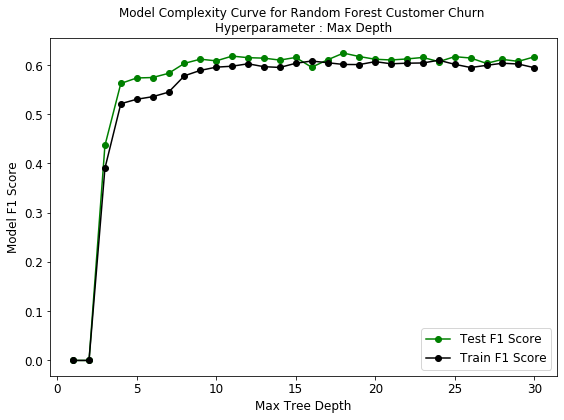

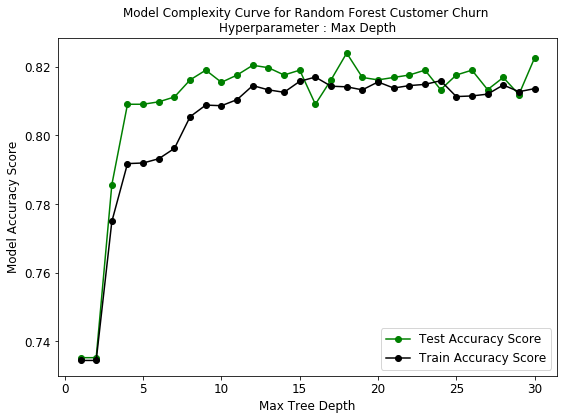

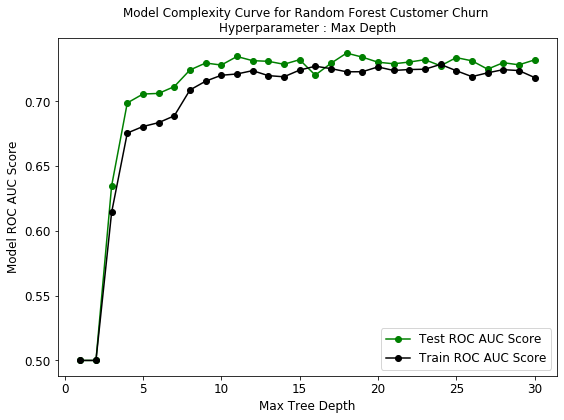

In [54]:
hyperForest(X_train, y_train, X_test, y_test,title="Model Complexity Curve for Random Forest Customer Churn \nHyperparameter : Max Depth")

<!DOCTYPE html>
<html>
<body>
<h5>Learning Curves in Random Forest</h5>
</body>
</html>

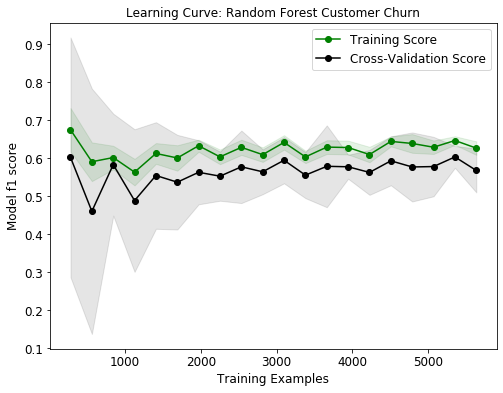

In [56]:
train_samp_data, RF_train_score_data, RF_fit_time_data, RF_pred_time_data = plot_learning_curve(estimator_model, X_train, y_train,scoring='f1',title="Random Forest Customer Churn")

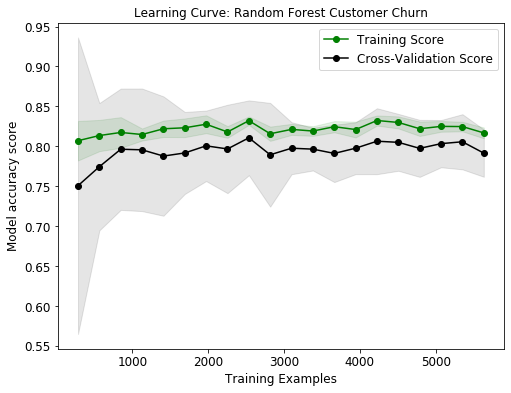

In [57]:
train_samp_data, RF_train_score_data, RF_fit_time_data, RF_pred_time_data = plot_learning_curve(estimator_model, X_train, y_train,scoring='accuracy',title="Random Forest Customer Churn")

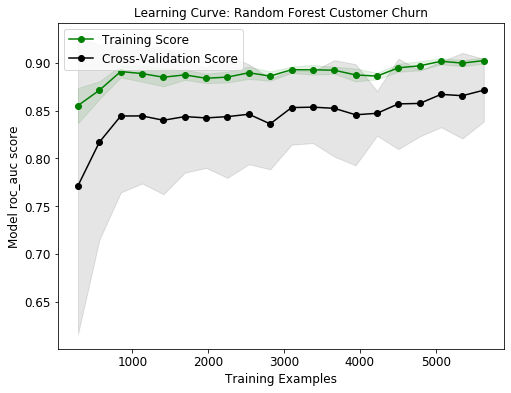

In [58]:
train_samp_data, RF_train_score_data, RF_fit_time_data, RF_pred_time_data = plot_learning_curve(estimator_model, X_train, y_train,scoring='roc_auc',title="Random Forest Customer Churn")

<!DOCTYPE html>
<html>
<body>
<h5>Results in Random Forest</h5>
</body>
</html>

Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   0.09341
Model Prediction Time (s): 0.00447

Training Metrics

F1 Score:  0.60
Accuracy:  0.81     AUC:       0.72
Precision: 0.70     Recall:    0.52

Testing Metrics

F1 Score:  0.60
Accuracy:  0.81     AUC:       0.72
Precision: 0.70     Recall:    0.53
*****************************************************


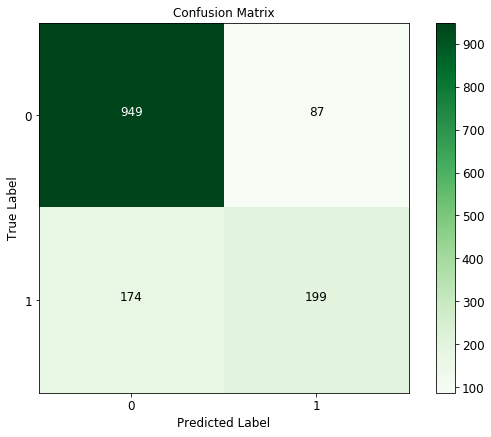

In [59]:
final_classifier_evaluation(estimator_model, X_train, X_test, y_train, y_test)

<!DOCTYPE html>
<html>
<body>
<h5>NEURAL NETWORKS </h5>
<p><h10>Source code: https://github.com/kylewest520/CS-7641---Machine-Learning/blob/master/Assignment%201%20Supervised%20Learning/CS%207641%20HW1%20Code.py </h10></p>
</body>
</html>

In [60]:
from sklearn.neural_network import MLPClassifier
def hyperNN(X_train, y_train, X_test, y_test, title,selection):
    f1_test = []
    f1_train = []
    accuracy_test = []
    accuracy_train = []
    roc_auc_test = []
    roc_auc_train = []
    xLabel = 'tmp'
    if(selection == 'hidden_layer_sizes') :
        xLabel = 'No. Hidden Units'
        hlist = np.array(range(2,41))
        for i in hlist:         
            clf = MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(i, 9), learning_rate='constant',
              learning_rate_init=0.01, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=1e-09,
              validation_fraction=0.1, verbose=False, warm_start=False)            
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            f1_test.append(f1_score(y_test, y_pred_test))
            f1_train.append(f1_score(y_train, y_pred_train))
            accuracy_test.append(accuracy_score(y_test, y_pred_test, normalize=True))
            accuracy_train.append(accuracy_score(y_train, y_pred_train, normalize=True))
            roc_auc_test.append(roc_auc_score(y_test, y_pred_test) )
            roc_auc_train.append(roc_auc_score(y_train, y_pred_train) )
    elif(selection == 'alpha'):
        xLabel = 'alpha'
        hlist = np.array([0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10])
        for i in hlist:         
            clf = MLPClassifier(activation='logistic', alpha=i, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 9), learning_rate='constant',
              learning_rate_init=0.01, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=1e-09,
              validation_fraction=0.1, verbose=False, warm_start=False)   
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            f1_test.append(f1_score(y_test, y_pred_test))
            f1_train.append(f1_score(y_train, y_pred_train))
            accuracy_test.append(accuracy_score(y_test, y_pred_test, normalize=True))
            accuracy_train.append(accuracy_score(y_train, y_pred_train, normalize=True))
            roc_auc_test.append(roc_auc_score(y_test, y_pred_test) )
            roc_auc_train.append(roc_auc_score(y_train, y_pred_train) )
    elif(selection == 'activation'):
        xLabel = 'activation'
        hlist = np.array(['identity', 'logistic', 'tanh', 'relu'])
        for i in hlist:         
            clf = MLPClassifier(activation=i, alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 9), learning_rate='constant',
              learning_rate_init=0.01, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=1e-09,
              validation_fraction=0.1, verbose=False, warm_start=False)
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            f1_test.append(f1_score(y_test, y_pred_test))
            f1_train.append(f1_score(y_train, y_pred_train))
            accuracy_test.append(accuracy_score(y_test, y_pred_test, normalize=True))
            accuracy_train.append(accuracy_score(y_train, y_pred_train, normalize=True))
            roc_auc_test.append(roc_auc_score(y_test, y_pred_test) )
            roc_auc_train.append(roc_auc_score(y_train, y_pred_train) )
    elif(selection == 'solver'):
        xLabel = 'solver'
        hlist = np.array(['lbfgs', 'sgd', 'adam'])
        for i in hlist:         
            clf = MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 9), learning_rate='constant',
              learning_rate_init=0.01, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver=i, tol=1e-09,
              validation_fraction=0.1, verbose=False, warm_start=False)
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            f1_test.append(f1_score(y_test, y_pred_test))
            f1_train.append(f1_score(y_train, y_pred_train))
            accuracy_test.append(accuracy_score(y_test, y_pred_test, normalize=True))
            accuracy_train.append(accuracy_score(y_train, y_pred_train, normalize=True))
            roc_auc_test.append(roc_auc_score(y_test, y_pred_test) )
            roc_auc_train.append(roc_auc_score(y_train, y_pred_train) )    
      
    plt.plot(hlist, f1_test, 'o-', color='green', label='Test F1 Score')
    plt.plot(hlist, f1_train, 'o-', color = 'black', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel(xLabel)
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    plt.plot(hlist, accuracy_test, 'o-', color='green', label='Test Accuracy Score')
    plt.plot(hlist, accuracy_train, 'o-', color = 'black', label='Train Accuracy Score')
    plt.ylabel('Model Accuracy Score')
    plt.xlabel(xLabel)
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    plt.plot(hlist, roc_auc_test, 'o-', color='green', label='Test ROC-AUC Score')
    plt.plot(hlist, roc_auc_train, 'o-', color = 'black', label='Train ROC-AUC Score')
    plt.ylabel('Model ROC-AUC Score')
    plt.xlabel(xLabel)
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [243]:
# Choose the type of classifier. 
clf = MLPClassifier(alpha=0.0001, solver='lbfgs', random_state=42,tol=0.000000001, activation = 'logistic')


#it = [2,5,8,11,14,17,20]
#it1 = [0,3,6,9,12,15,18]
#combined = [(x,y) for x in it for y in it1]

#[(2,),(2, 3),(2, 6),(2, 9),(2, 12),(2, 15),(2, 18),(5,),(5, 3),(5, 6),(5, 9),(5, 12),
#                                     (5, 15),(5, 18),(8,),(8, 3),(8, 6),(8, 9),(8, 12),(8, 15),(8, 18),(11,),(11, 3),
#                                     (11, 6),(11, 9),(11, 12),(11, 15),(11, 18),(14,),(14,3),(14,6),(14,9),(14,12),
#                                     (14, 15),(14, 18),(17,),(17, 3),(17, 6),(17, 9),(17, 12),(17, 15),(17, 18),(20,),
#                                     (20, 3),(20, 6),(20, 9),(20, 12),(20, 15),(20, 18)]





hidden_layers = [(2,),(2, 3),(2, 3, 3), (2, 3, 6), (2, 3, 9), (2, 3, 12), (2, 6), (2, 6, 3), 
                 (2, 6, 6), (2, 6, 9), (2, 6, 12), (2, 9), (2, 9, 3), (2, 9, 6),(2, 9, 9), 
                 (2, 9, 12), (2, 12), (2, 12, 3), (2, 12, 6), (2, 12, 9),(2, 12, 12), 
                 (5), (5, 3), (5, 3, 3), (5, 3, 6), (5, 3, 9), (5, 3, 12), (5, 6), 
                 (5, 6, 3), (5, 6, 6), (5, 6, 9), (5, 6, 12), (5, 9), (5, 9, 3), (5, 9, 6), 
                 (5, 9, 9), (5, 9, 12), (5, 12), (5, 12, 3), (5, 12, 6),(5, 12, 9), 
                 (5, 12, 12), (8), (8, 3), (8, 3, 3), (8, 3, 6), (8, 3, 9), (8, 3, 12), 
                 (8, 6), (8, 6, 3), (8, 6, 6), (8, 6, 9), (8, 6, 12), (8, 9),(8, 9, 3), 
                 (8, 9, 6), (8, 9, 9), (8, 9, 12), (8, 12), (8, 12, 3),(8, 12, 6), (8, 12, 9), 
                 (8, 12, 12), (11,), (11, 3),(11, 3, 3), (11, 3, 6),(11, 3, 9), (11, 3, 12), 
                 (11, 6), (11, 6, 3), (11, 6, 6), (11, 6, 9),(11, 6, 12),(11, 9), (11, 9, 3), 
                 (11, 9, 6), (11, 9, 9), (11, 9, 12), (11, 12),(11, 12, 3), (11, 12, 6), 
                 (11, 12, 9), (11, 12, 12), (14,),(14, 3),(14, 3, 3),(14, 3, 6), (14, 3, 9), 
                 (14, 3, 12), (14, 6),(14, 6, 3),(14, 6, 6), (14, 6, 9),(14, 6, 12), (14, 9),
                 (14, 9, 3), (14, 9, 6), (14, 9, 9), (14, 9, 12), (14, 12),(14, 12, 3), 
                 (14, 12, 6), (14, 12, 9), (14, 12, 12)]


# Choose some parameter combinations to try
parameters = {'hidden_layer_sizes': hidden_layers, 
              'learning_rate_init': [0.01, 0.05, .1], 
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(estimator = clf,param_grid=parameters, scoring=acc_scorer)

#for X_train, y_train in X_trains, y_trains:
#, warm_start=True
grid_obj = grid_obj.fit(X_train, y_train )

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator_model = clf.fit(X_train, y_train)

estimator_model

/home/nmerinos/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 9), learning_rate='constant',
              learning_rate_init=0.01, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=1e-09,
              validation_fraction=0.1, verbose=False, warm_start=False)

<!DOCTYPE html>
<html>
<body>
<h5>Complexity Curves in Neural Network</h5>
<p>
<h7>Hyperparrameter : Hidden Layer Size</h7>    
</body>
</html>

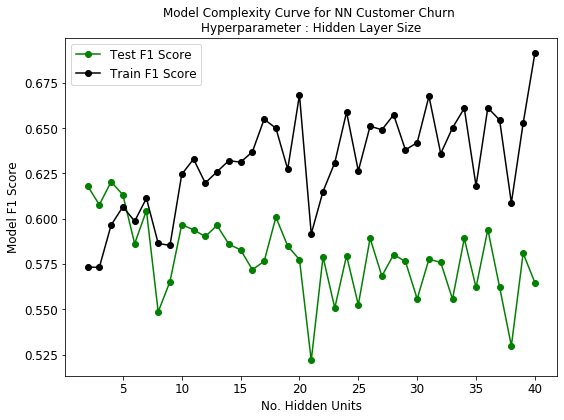

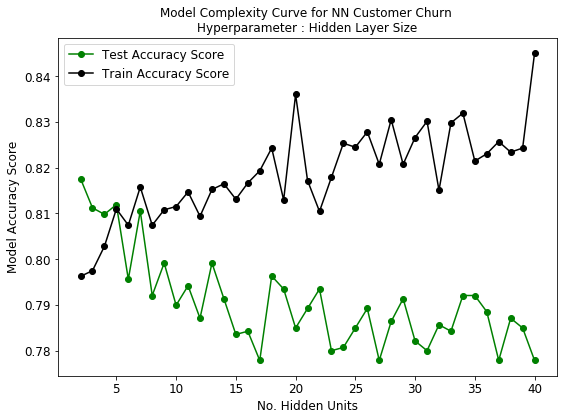

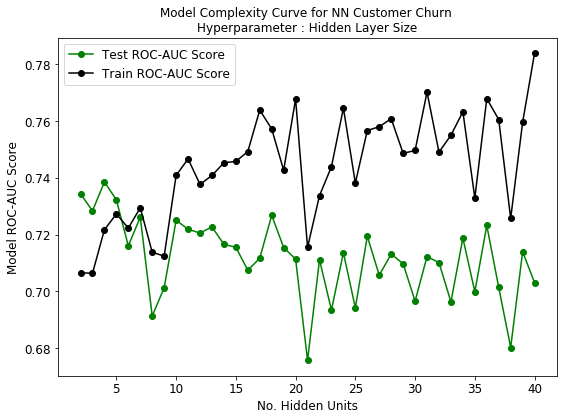

In [61]:
hyperNN(X_train, y_train, X_test, y_test,title="Model Complexity Curve for NN Customer Churn \nHyperparameter : Hidden Layer Size",selection="hidden_layer_sizes")

<!DOCTYPE html>
<html>
<body>
<h7>Hyperparrameter : Alpha</h7>    
</body>
</html>

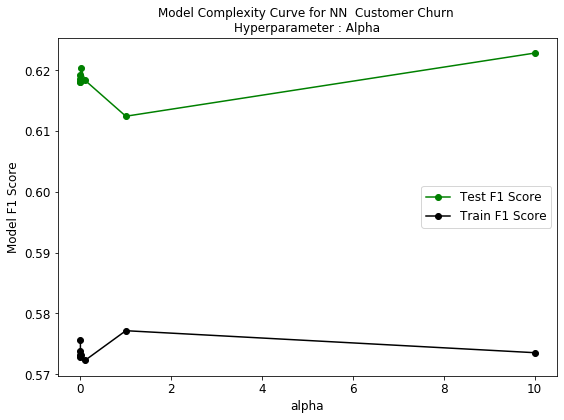

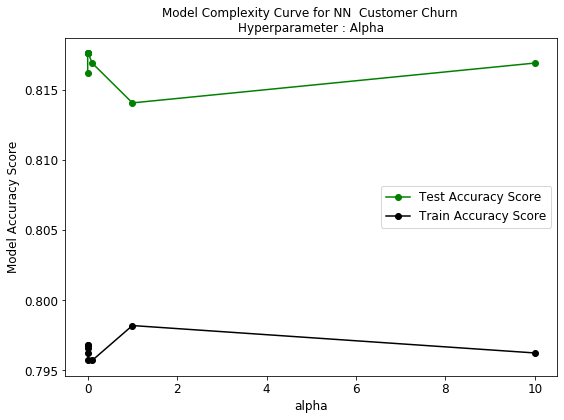

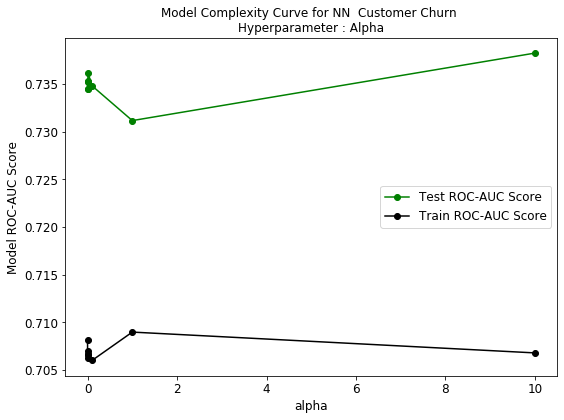

In [62]:
hyperNN(X_train, y_train, X_test, y_test,title="Model Complexity Curve for NN  Customer Churn \nHyperparameter : Alpha",selection="alpha")

<!DOCTYPE html>
<html>
<body>
<h7>Hyperparrameter : Activation</h7>    
</body>
</html>

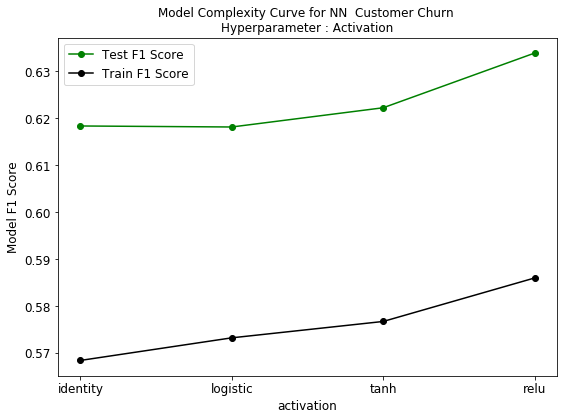

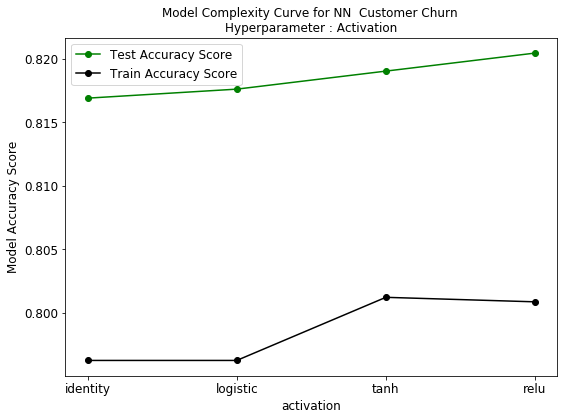

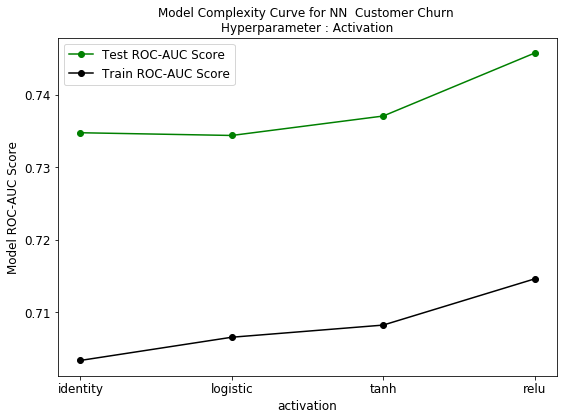

In [63]:
hyperNN(X_train, y_train, X_test, y_test,title="Model Complexity Curve for NN  Customer Churn \nHyperparameter : Activation",selection="activation")

<!DOCTYPE html>
<html>
<body>
<h7>Hyperparrameter : Solver</h7>    
</body>
</html>

/home/nmerinos/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


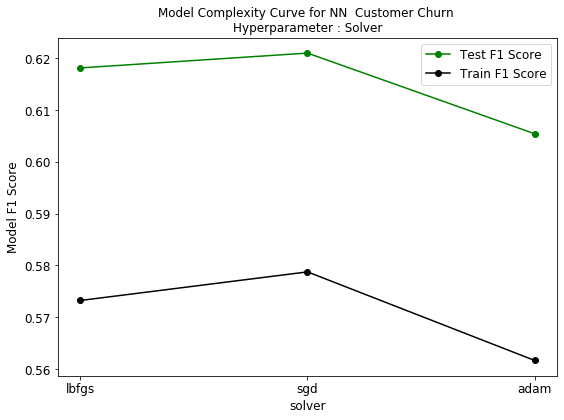

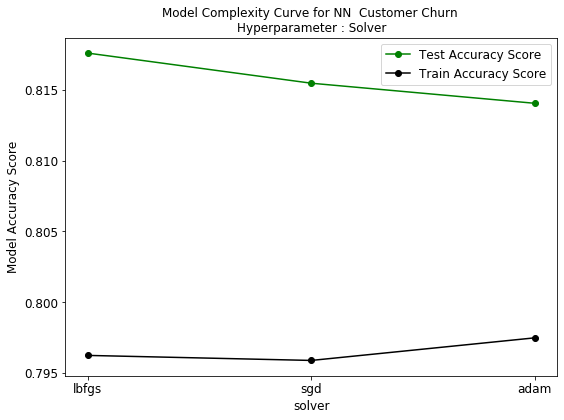

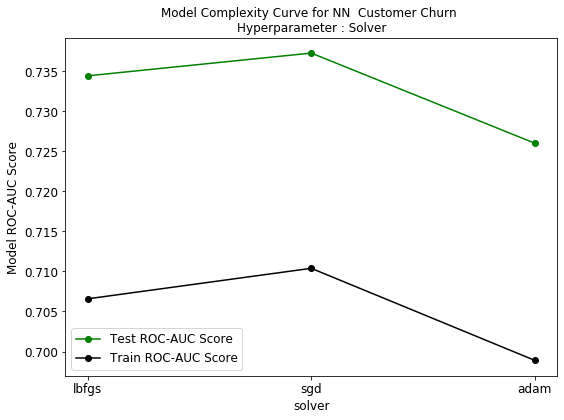

In [64]:
hyperNN(X_train, y_train, X_test, y_test,title="Model Complexity Curve for NN  Customer Churn \nHyperparameter : Solver",selection="solver")

<!DOCTYPE html>
<html>
<body>
<h5>Learning Curves in Neural Network</h5>
</body>
</html>

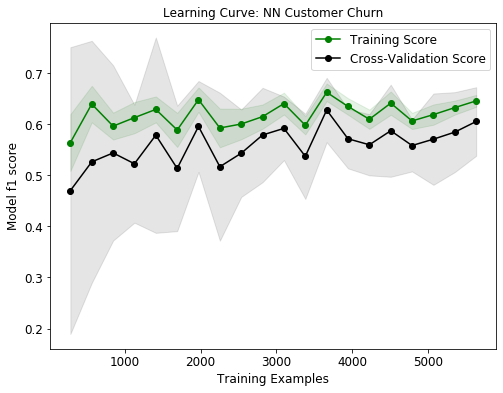

In [66]:
train_samp_data, RF_train_score_data, RF_fit_time_data, RF_pred_time_data = plot_learning_curve(estimator_model, X_train, y_train,scoring='f1',title="NN Customer Churn")

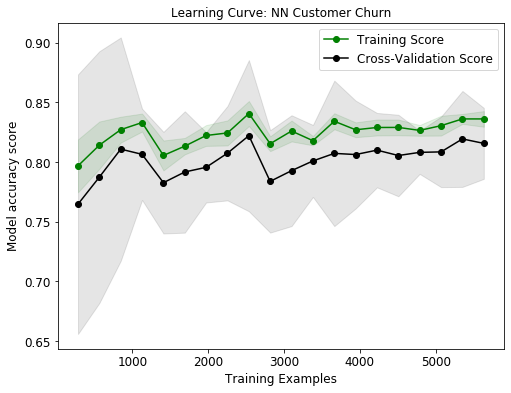

In [67]:
train_samp_data, RF_train_score_data, RF_fit_time_data, RF_pred_time_data = plot_learning_curve(estimator_model, X_train, y_train,scoring='accuracy',title="NN Customer Churn")

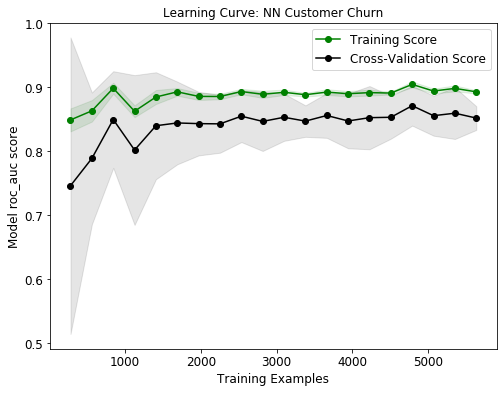

In [72]:
train_samp_data, RF_train_score_data, RF_fit_time_data, RF_pred_time_data = plot_learning_curve(estimator_model, X_train, y_train,scoring='roc_auc',title="NN Customer Churn")

<!DOCTYPE html>
<html>
<body>
<h5>Results in Neural Networks</h5>
</body>
</html>

Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   0.06297
Model Prediction Time (s): 0.00497

Training Metrics

F1 Score:  0.60
Accuracy:  0.81     AUC:       0.72
Precision: 0.70     Recall:    0.52

Testing Metrics

F1 Score:  0.60
Accuracy:  0.81     AUC:       0.72
Precision: 0.70     Recall:    0.53
*****************************************************


/home/nmerinos/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


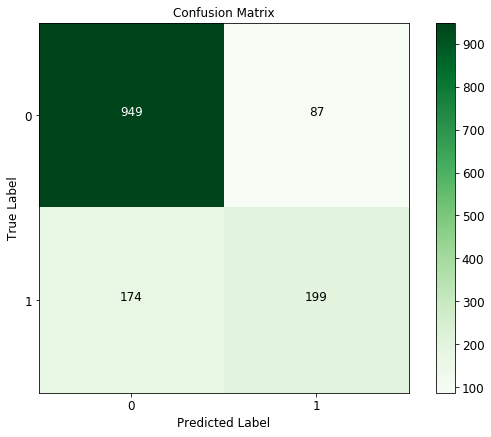

In [69]:
final_classifier_evaluation(estimator_model, X_train, X_test, y_train, y_test)

<!DOCTYPE html>
<html>
<body>
<h5>SVM </h5>
<p><h10>Source code: https://github.com/kylewest520/CS-7641---Machine-Learning/blob/master/Assignment%201%20Supervised%20Learning/CS%207641%20HW1%20Code.py </h10></p>
</body>
</html>

In [78]:
from sklearn.svm import SVC

def hyperSVM(X_train, y_train, X_test, y_test, title):

    f1_test = []
    f1_train = []
    accuracy_test = []
    accuracy_train = []
    roc_auc_test = []
    roc_auc_train = []
    kernel_func = ['linear','poly','rbf','sigmoid']
    for i in kernel_func:         
            if i == 'poly':
                for j in [2,3,4,5,6,7,8]:
                    clf =  SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
                    decision_function_shape='ovr', degree=3, gamma=0.01, kernel=i,
                    max_iter=-1, probability=False, random_state=100, shrinking=True, tol=0.001,
                    verbose=False)
                    clf.fit(X_train, y_train)
                    y_pred_test = clf.predict(X_test)
                    y_pred_train = clf.predict(X_train)
                    f1_test.append(f1_score(y_test, y_pred_test))
                    f1_train.append(f1_score(y_train, y_pred_train))
                    accuracy_test.append(accuracy_score(y_test, y_pred_test, normalize=True))
                    accuracy_train.append(accuracy_score(y_train, y_pred_train, normalize=True))
                    roc_auc_test.append(roc_auc_score(y_test, y_pred_test) )
                    roc_auc_train.append(roc_auc_score(y_train, y_pred_train) )
            else:    
                clf = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
                decision_function_shape='ovr', degree=3, gamma=0.01, kernel=i,
                max_iter=-1, probability=False, random_state=100, shrinking=True, tol=0.001,
                verbose=False)
                clf.fit(X_train, y_train)
                y_pred_test = clf.predict(X_test)
                y_pred_train = clf.predict(X_train)
                f1_test.append(f1_score(y_test, y_pred_test))
                f1_train.append(f1_score(y_train, y_pred_train))
                accuracy_test.append(accuracy_score(y_test, y_pred_test, normalize=True))
                accuracy_train.append(accuracy_score(y_train, y_pred_train, normalize=True))
                roc_auc_test.append(roc_auc_score(y_test, y_pred_test) )
                roc_auc_train.append(roc_auc_score(y_train, y_pred_train) )
    xvals = ['linear','poly2','poly3','poly4','poly5','poly6','poly7','poly8','rbf','sigmoid']
    plt.plot(xvals, f1_test, 'o-', color='green', label='Test F1 Score')
    plt.plot(xvals, f1_train, 'o-', color = 'black', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('Kernel Function')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    xvals = ['linear','poly2','poly3','poly4','poly5','poly6','poly7','poly8','rbf','sigmoid']
    plt.plot(xvals, accuracy_test, 'o-', color='green', label='Test Accuracy Score')
    plt.plot(xvals, accuracy_train, 'o-', color = 'black', label='Train Accuracy Score')
    plt.ylabel('Model Accuracy Score')
    plt.xlabel('Kernel Function')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    xvals = ['linear','poly2','poly3','poly4','poly5','poly6','poly7','poly8','rbf','sigmoid']
    plt.plot(xvals, roc_auc_test, 'o-', color='green', label='Test ROC-AUC Score')
    plt.plot(xvals, roc_auc_train, 'o-', color = 'black', label='Train ROC-AUC Score')
    plt.ylabel('Model ROC-AUC Score')
    plt.xlabel('Kernel Function')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [75]:
# Choose the type of classifier. 
clf = SVC(random_state=100)

# Choose some parameter combinations to try
parameters = {'C': [100], 
              'gamma': [0.001, 0.01, 1e01, 1],
              'kernel': ['linear','rbf','sigmoid'], 
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(estimator = clf,param_grid=parameters, scoring=acc_scorer, cv=5)

#for X_train, y_train in X_trains, y_trains:
#, warm_start=True
grid_obj = grid_obj.fit(X_train, y_train )

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator_model = clf.fit(X_train, y_train)

estimator_model

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=100, shrinking=True, tol=0.001,
    verbose=False)

<!DOCTYPE html>
<html>
<body>
<h5>Complexity Curves in SVM</h5>
</body>
</html>

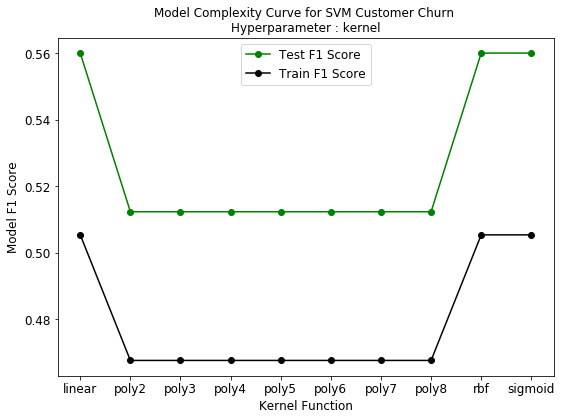

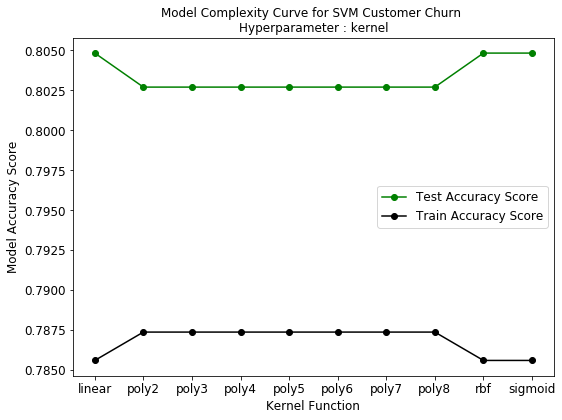

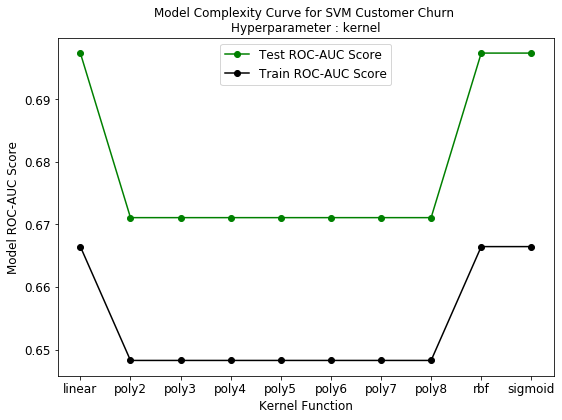

In [79]:
hyperSVM(X_train, y_train, X_test, y_test,title="Model Complexity Curve for SVM Customer Churn \nHyperparameter : kernel")

<!DOCTYPE html>
<html>
<body>
<h5>Learning Curves in SVM</h5>
</body>
</html>

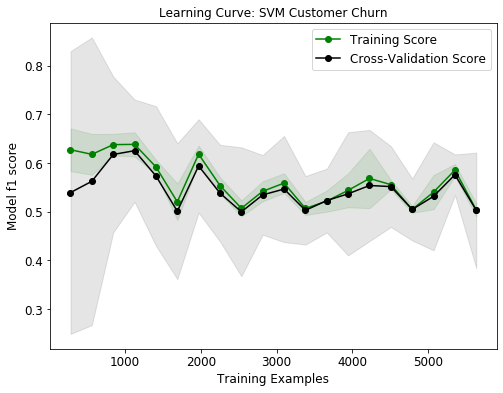

In [80]:
train_samp_data, RF_train_score_data, RF_fit_time_data, RF_pred_time_data = plot_learning_curve(estimator_model, X_train, y_train,scoring='f1',title="SVM Customer Churn")

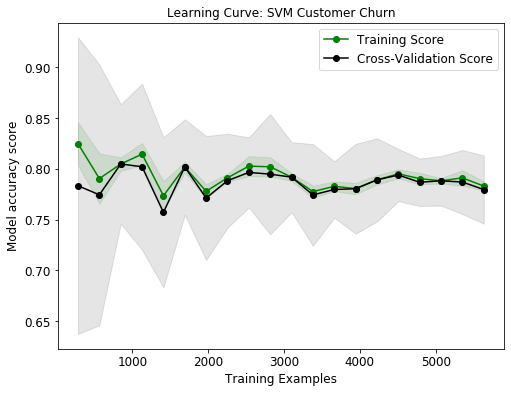

In [81]:
train_samp_data, RF_train_score_data, RF_fit_time_data, RF_pred_time_data = plot_learning_curve(estimator_model, X_train, y_train,scoring='accuracy',title="SVM Customer Churn")

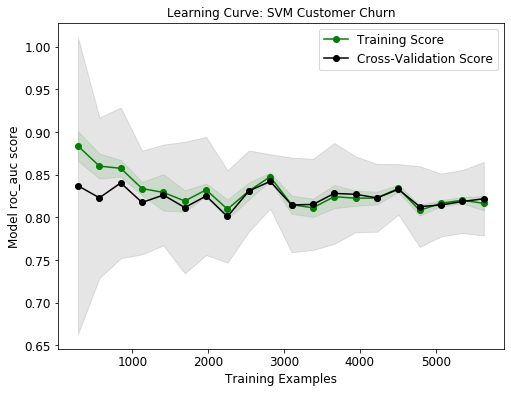

In [82]:
train_samp_data, RF_train_score_data, RF_fit_time_data, RF_pred_time_data = plot_learning_curve(estimator_model, X_train, y_train,scoring='roc_auc',title="SVM Customer Churn")

<!DOCTYPE html>
<html>
<body>
<h5>Results in SVM</h5>
</body>
</html>

Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   1.33458
Model Prediction Time (s): 0.16481

Training Metrics

F1 Score:  0.51
Accuracy:  0.79     AUC:       0.67
Precision: 0.65     Recall:    0.41

Testing Metrics

F1 Score:  0.56
Accuracy:  0.80     AUC:       0.70
Precision: 0.69     Recall:    0.47
*****************************************************


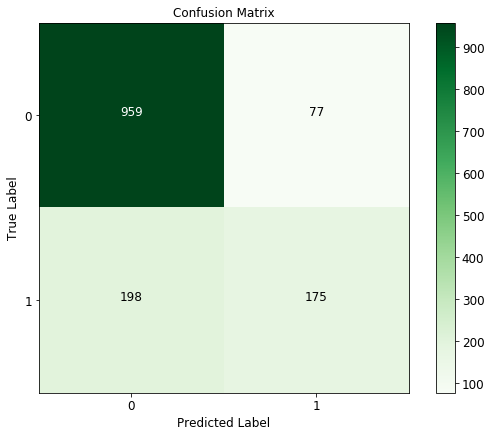

In [83]:
final_classifier_evaluation(estimator_model, X_train, X_test, y_train, y_test)

<!DOCTYPE html>
<html>
<body>
<h5>KNN</h5>
<p><h10>Source code: https://github.com/kylewest520/CS-7641---Machine-Learning/blob/master/Assignment%201%20Supervised%20Learning/CS%207641%20HW1%20Code.py </h10></p>
</body>
</html>

In [86]:
from sklearn.neighbors import KNeighborsClassifier as kNN

def hyperKNN(X_train, y_train, X_test, y_test, title):
    
    f1_test = []
    f1_train = []
    accuracy_test = []
    accuracy_train = []
    roc_auc_test = []
    roc_auc_train = []
    klist = np.linspace(1,200,25).astype('int')
    for i in klist:
        clf = kNN(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=i, p=2,
                     weights='uniform')
        
        clf.fit(X_train,y_train)
        y_pred_test = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)
        f1_test.append(f1_score(y_test, y_pred_test))
        f1_train.append(f1_score(y_train, y_pred_train))
        accuracy_test.append(accuracy_score(y_test, y_pred_test, normalize=True))
        accuracy_train.append(accuracy_score(y_train, y_pred_train, normalize=True))
        roc_auc_test.append(roc_auc_score(y_test, y_pred_test) )
        roc_auc_train.append(roc_auc_score(y_train, y_pred_train) )
    
        
    plt.plot(klist, f1_test, 'o-', color='green', label='Test F1 Score')
    plt.plot(klist, f1_train, 'o-', color = 'black', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('No. Neighbors')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    plt.plot(klist, accuracy_test, 'o-', color='green', label='Test Accuracy Score')
    plt.plot(klist, accuracy_train, 'o-', color = 'black', label='Train Accuracy Score')
    plt.ylabel('Model Accuracy Score')
    plt.xlabel('No. Neighbors')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    plt.plot(klist, roc_auc_test, 'o-', color='green', label='Test ROC-AUC Score')
    plt.plot(klist, roc_auc_train, 'o-', color = 'black', label='Train ROC-AUC Score')
    plt.ylabel('Model ROC-AUC Score')
    plt.xlabel('No. Neighbors')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()  

In [260]:
# Choose the type of classifier. 
clf = kNN()

# Choose some parameter combinations to try

parameters = {'n_neighbors': list(range(1, 75)),}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(estimator = clf,param_grid=parameters, scoring=acc_scorer, cv=5)

#for X_train, y_train in X_trains, y_trains:
#, warm_start=True
grid_obj = grid_obj.fit(X_train, y_train )

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator_model = clf.fit(X_train, y_train)

estimator_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=74, p=2,
                     weights='uniform')

<!DOCTYPE html>
<html>
<body>
<h5>Complexity Curves in KNN</h5>
</body>
</html>

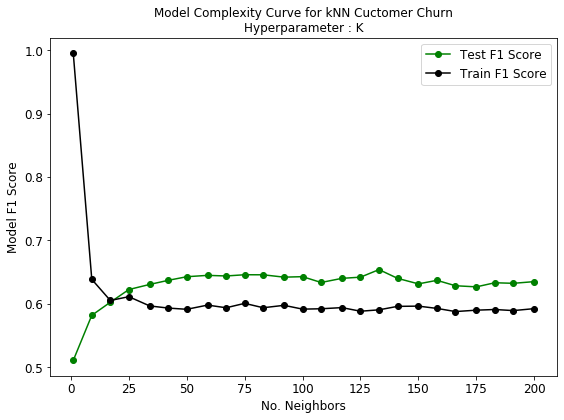

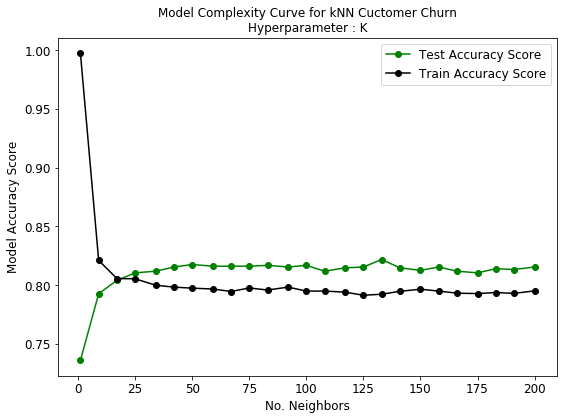

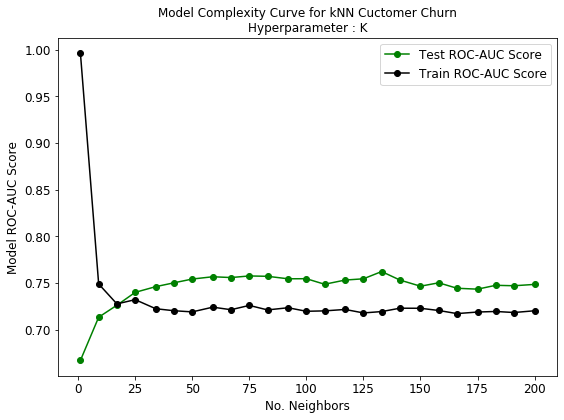

In [261]:
hyperKNN(X_train, y_train, X_test, y_test,title="Model Complexity Curve for kNN Cuctomer Churn\nHyperparameter : K")

<!DOCTYPE html>
<html>
<body>
<h5>Learning Curves in KNN</h5>
</body>
</html>

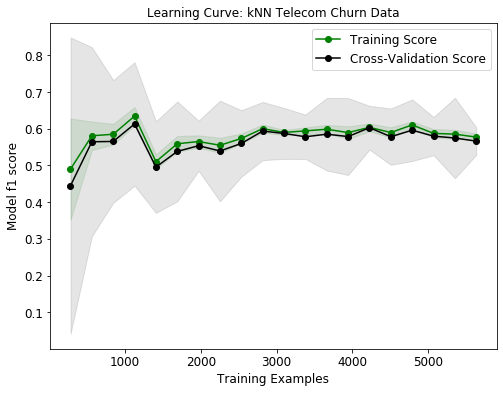

In [262]:
train_samp_data, kNN_train_score_data, kNN_fit_time_data, kNN_pred_time_data = plot_learning_curve(estimator_model, X_train, y_train, scoring='f1', title="kNN Telecom Churn Data")

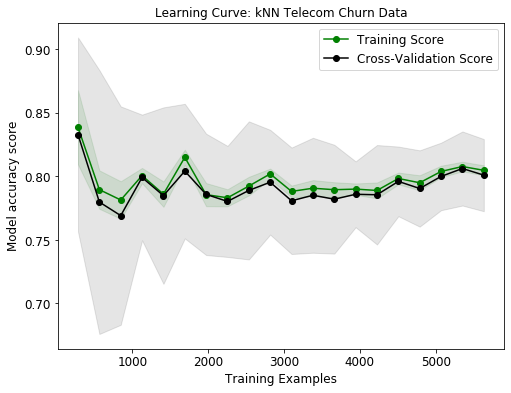

In [263]:
train_samp_data, kNN_train_score_data, kNN_fit_time_data, kNN_pred_time_data = plot_learning_curve(estimator_model, X_train, y_train, scoring='accuracy', title="kNN Telecom Churn Data")

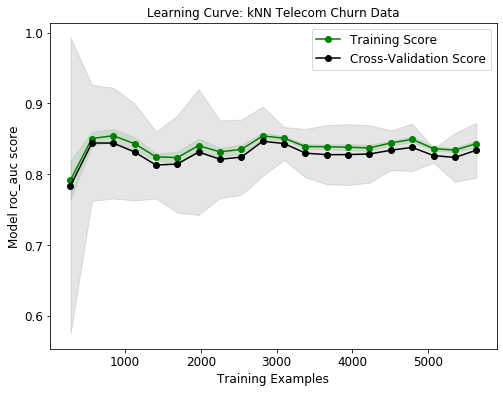

In [264]:
train_samp_data, kNN_train_score_data, kNN_fit_time_data, kNN_pred_time_data = plot_learning_curve(estimator_model, X_train, y_train, scoring='roc_auc', title="kNN Telecom Churn Data")

<!DOCTYPE html>
<html>
<body>
<h5>Results in KNN</h5>
</body>
</html>

Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   1.17744
Model Prediction Time (s): 0.15736

Training Metrics

F1 Score:  0.51
Accuracy:  0.79     AUC:       0.67
Precision: 0.65     Recall:    0.41

Testing Metrics

F1 Score:  0.56
Accuracy:  0.80     AUC:       0.70
Precision: 0.69     Recall:    0.47
*****************************************************


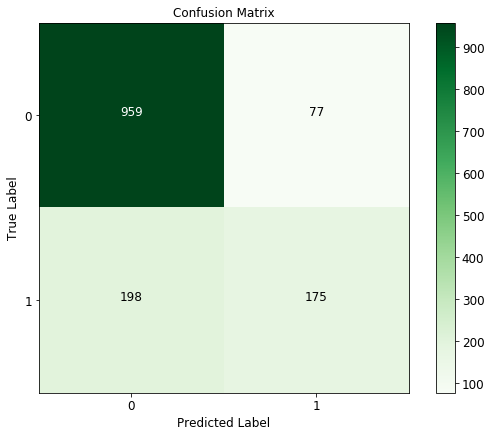

In [84]:
final_classifier_evaluation(estimator_model, X_train, X_test, y_train, y_test)

<!DOCTYPE html>
<html>
<body>
<h3>COMBINED MODEL RESULTS</h3>
</body>
</html>

In [101]:
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier  

em1 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=17, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, n_estimators=19,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start='false')
em2 = MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 9), learning_rate='constant',
              learning_rate_init=0.01, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=1e-09,
              validation_fraction=0.1, verbose=False, warm_start=False)
em3 = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
    max_iter=-1, probability=True, random_state=100, shrinking=True, tol=0.001,
    verbose=False)
em4 = kNN(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=74, p=2,
                     weights='uniform')

C:\Users\jasse\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


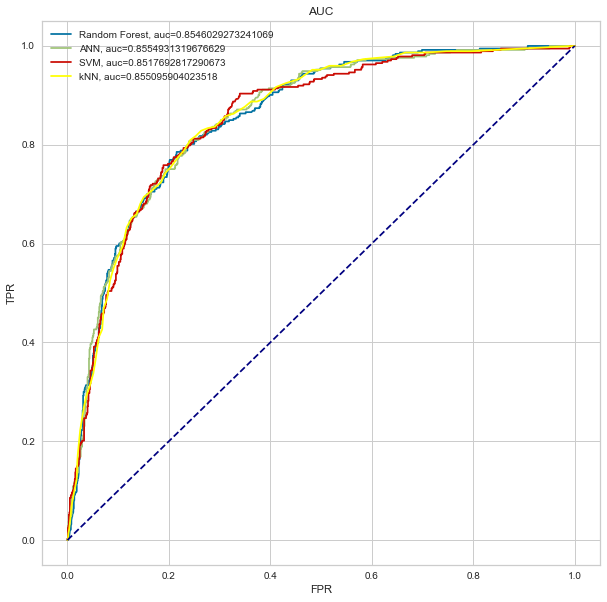

In [106]:
# AUC Curve 

from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

em1.fit(X_train, y_train)
em1_predictions = em1.predict_proba(X_test)
em1_predictions = em1_predictions[:,1]


em2.fit(X_train, y_train)
em2_predictions = em2.predict_proba(X_test)
em2_predictions = em2_predictions[:,1]

em3.fit(X_train, y_train)
em3_predictions = em3.predict_proba(X_test)
em3_predictions = em3_predictions[:,1]

em4.fit(X_train, y_train)
em4_predictions = em4.predict_proba(X_test)
em4_predictions = em4_predictions[:,1]

plt.figure(figsize=(10,10)).clf()


fpr, tpr, thresh = metrics.roc_curve(y_test, em1_predictions)
auc = metrics.roc_auc_score(y_test, em1_predictions)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, em2_predictions)
auc = metrics.roc_auc_score(y_test, em2_predictions)
plt.plot(fpr,tpr,label="ANN, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, em3_predictions)
auc = metrics.roc_auc_score(y_test, em3_predictions)
plt.plot(fpr,tpr,label="SVM, auc="+str(auc))


fpr, tpr, thresh = metrics.roc_curve(y_test, em4_predictions)
auc = metrics.roc_auc_score(y_test, em4_predictions)
plt.plot(fpr,tpr,label="kNN, auc="+str(auc), color='yellow')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('AUC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=0)


In [ ]:
plot_learning_curve_combined(em1,em2,em3,em4, X_train, y_train,scoring='roc_auc',title="Customer Churn")

In [ ]:
plot_learning_curve_combined(em1,em2,em3,em4, X_train, y_train,scoring='accuracy',title="Customer Churn")

In [ ]:
plot_learning_curve_combined(em1,em2,em3,em4, X_train, y_train,scoring='f1',title="Customer Churn")

<!DOCTYPE html>
<html>
<body>
<h3>PICKLE</h3>
</body>
</html>

In [266]:
import pickle

In [377]:
# Choose the type of classifier. 
#final_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
#                       max_depth=19, max_features='sqrt', max_leaf_nodes=None,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=8, min_samples_split=5,
#                       min_weight_fraction_leaf=0.0, n_estimators=99,
#                       n_jobs=None, oob_score=False, random_state=None,
#                       verbose=0, warm_start='false')
final_model = kNN(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=74, p=2,
                     weights='uniform')
#Fiting the final model
final_model.fit(X_train, y_train)

#saving the model
with open('finalmodel.pickle2','wb') as f: 
    pickle.dump(final_model,f)
        
#retrieving the model
pickle_in = open('finalmodel.pickle2','rb')
final_model = pickle.load(pickle_in)

#predicting with new data
accuracy  = final_model.score(X_test,y_test) 
#chun_prediction = final_model.predict(X_new)
#print(churn_predict,accuracy)
#print(accuracy)

<!DOCTYPE html>
<html>
<body>
<h3>AUTOML</h3>
</body>
</html>

In [56]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2,
                      random_state=42, cv=5, config_dict='TPOT light')
tpot.fit(X_train, y_train)
#print(tpot.score(X_test, y_test))

Generation 1 - Current best internal CV score: 0.7884231218230674
Generation 2 - Current best internal CV score: 0.7933950601221326
Generation 3 - Current best internal CV score: 0.7933950601221326
Generation 4 - Current best internal CV score: 0.7935726800155606
Generation 5 - Current best internal CV score: 0.7941060119494583

Best pipeline: LogisticRegression(input_matrix, C=15.0, dual=True, penalty=l2)


TPOTClassifier(config_dict='TPOT light', crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=5,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=20,
        random_state=42, scoring=None, subsample=1.0, template=None,
        use_dask=False, verbosity=2, warm_start=False)

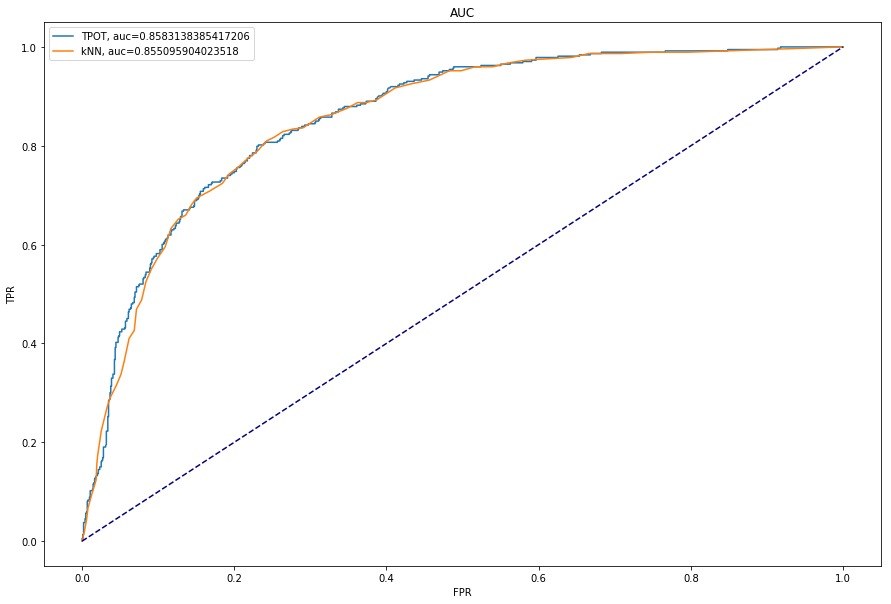

In [89]:
# AUC Curve 

from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



tpot_predictions = tpot.predict_proba(X_test)
em4_predictions = em4.predict_proba(X_test)

plt.figure(figsize=(15,10)).clf()

tpot_predictions = np.array(tpot_predictions)
tpot_predictions = tpot_predictions[:,1]

em4_predictions = np.array(em4_predictions)
em4_predictions = em4_predictions[:,1]



fpr, tpr, thresh = metrics.roc_curve(y_test, tpot_predictions, pos_label=1)
auc = metrics.roc_auc_score(y_test, tpot_predictions)
plt.plot(fpr,tpr,label="TPOT, auc="+str(auc))


fpr, tpr, thresh = metrics.roc_curve(y_test , em4_predictions)
auc = metrics.roc_auc_score(y_test, em4_predictions)
plt.plot(fpr,tpr,label="kNN, auc="+str(auc))

#print(em4_predictions.tolist())
#print(tpr)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('AUC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=0)